# Machine Learning Project

<div class="alert alert-block alert-info">

# Index
    
[1. Import necessary libraries](#1)<br>
    
[2. Load Files](#2)<br>
    
[3. Define data and target](#3)<br>
  
[4. Initial Analysis](#4)<br>

- [4.1 Check Missing Values](#4.1)<br>
    
- [4.2 Check File Statistics](#4.2)<br>  

- [4.3 Check Duplicates Observations](#4.3)<br> 

- [4.4 Check and Removing Outliers](#4.4)<br>
 
- [4.5 Correlations](#4.5)<br>
    
[5. Feature Engineering](#5)<br>

[6. Data Normalization](#6)<br>

- [6.1 Train Dataset](#6.1)<br>
    
- [6.2 Test Dataset](#6.2)<br>  

- [6.3 One Hot Encoding](#6.3)<br>
    
[7. Feature Selection](#7)<br>

- [7.1 Chi Square for Categorical data](#7.1)<br>
    
- [7.2 Mutual Information ](#7.2)<br>  

- [7.3 Univariate Features](#7.3)<br>  

- [7.4 RIDGE Regression Method](#7.4)<br>
    
- [7.5 Lasso Regression Method](#7.5)<br>  
    
- [7.6 Decision Tree Method](#7.6)<br>
   
- [7.7 ANOVA Method](#7.7)<br>

- [7.8 RFE](#7.8)<br>
    - [7.8.1 For Logistic Regression](#7.8.1)<br>
    - [7.8.2 For Decision Tree](#7.8.2)<br>
    - [7.8.3 For Gradiente Boosting](#7.8.3)<br>
    - [7.8.4 For Random Forest](#7.8.4)<br>
 
- [7.9 Final Feature Selection](#7.9)<br>

[8. Model Selection](#8)<br>
    
- [8.1 Logistic Regression Model](#8.1)<br>
    
- [8.2 Naive Bayes - Gaussian](#8.2)<br>  

- [8.3 K Nearest Neighbors Model](#8.3)<br>

- [8.4 Decision Tree Model](#8.4)<br>    

- [8.5 Neural Network Model](#8.5)<br>  

- [8.6 XGBoost Model](#8.6)<br>  
    
- [8.7 Gradient Boosting Model](#8.7)<br> 
    
- [8.8 AdaBoost Model](#8.8)<br> 
   
- [8.9 Support Vector Machine](#8.9)<br> 
    
[9. Model Assessment](#9)<br>

[10. Final Model](#10)<br>
    
</div>

<a class="anchor" id="1">

# 1. Import necessary libraries
    
</a>

In [254]:
!pip install xgboost

In [255]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import os
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import Ridge
import time
from sklearn import metrics
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# embedded methods
from sklearn.linear_model import LassoCV
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="2">

# 2. Load Files
    
</a>

In [256]:
#Download Training files
train_demo = pd.read_excel('train_demo.xlsx', sheet_name = 'Sheet1')
train_habits = pd.read_excel('train_habits.xlsx', sheet_name = 'Sheet1')
train_health = pd.read_excel('train_health.xlsx', sheet_name = 'Sheet1')

In [257]:
train_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PatientID   800 non-null    int64 
 1   Name        800 non-null    object
 2   Birth_Year  800 non-null    int64 
 3   Region      800 non-null    object
 4   Education   787 non-null    object
 5   Disease     800 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 37.6+ KB


In [258]:
#Download Test files
test_demo = pd.read_excel('test_demo.xlsx', sheet_name = 'Sheet1')
test_habits = pd.read_excel('test_habits.xlsx', sheet_name = 'Sheet1')
test_health = pd.read_excel('test_health.xlsx', sheet_name = 'Sheet1')

In [259]:
#Merge all Training files
train1 = pd.merge(train_demo, train_health, how="outer", on=["PatientID"])
train_merged = pd.merge(train1, train_habits, how="outer", on=["PatientID"])
train = train_merged.copy()
train.head()

,PatientID,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


In [260]:
#Merge all Test files
test1 = pd.merge(test_demo, test_health, how="outer", on=["PatientID"])
test_merged = pd.merge(test1, test_habits, how="outer", on=["PatientID"])
test = test_merged.copy()
test.set_index('PatientID', inplace = True)
test.head()

,Name,Birth_Year,Region,Education,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...,Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),171,80,225,130,21,0,Not sure,I do have diabetes,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1828,Mr. Robert Foreman,1978,West Midlands,High School Incomplete (10th to 11th grade),171,78,237,130,24,1,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1155,Mr. Edwin Ferguson,1968,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),174,87,313,108,19,0,Not sure,I do have diabetes,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Less than half a liter
1020,Mr. Eliseo Krefft,1962,East Midlands,High School Incomplete (10th to 11th grade),172,56,189,140,19,14,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Less than half a liter


In [261]:
#Change index to 'PatientID'
train.set_index('PatientID', inplace = True)

In [262]:
train.head()

,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


In [263]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Height            800 non-null    int64 
 6   Weight            800 non-null    int64 
 7   High_Cholesterol  800 non-null    int64 
 8   Blood_Pressure    800 non-null    int64 
 9   Mental_Health     800 non-null    int64 
 10  Physical_Health   800 non-null    int64 
 11  Checkup           800 non-null    object
 12  Diabetes          800 non-null    object
 13  Smoking_Habit     800 non-null    object
 14  Drinking_Habit    800 non-null    object
 15  Exercise          800 non-null    object
 16  Fruit_Habit       800 non-null    object
 17  Water_Habit 

<a class="anchor" id="3">

# 3. Define data and target
    
</a>

In [264]:
data = train.drop(['Disease'], axis=1)

In [265]:
target = train['Disease']


<a class="anchor" id="4">

# 4. Initial Analysis
    
</a>

<a class="anchor" id="4.1">

## 4.1. Check Missing Values
    
</a>

In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Height            800 non-null    int64 
 5   Weight            800 non-null    int64 
 6   High_Cholesterol  800 non-null    int64 
 7   Blood_Pressure    800 non-null    int64 
 8   Mental_Health     800 non-null    int64 
 9   Physical_Health   800 non-null    int64 
 10  Checkup           800 non-null    object
 11  Diabetes          800 non-null    object
 12  Smoking_Habit     800 non-null    object
 13  Drinking_Habit    800 non-null    object
 14  Exercise          800 non-null    object
 15  Fruit_Habit       800 non-null    object
 16  Water_Habit       800 non-null    object
dtypes: int64(7),

In [267]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              225 non-null    object
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Height            225 non-null    int64 
 5   Weight            225 non-null    int64 
 6   High_Cholesterol  225 non-null    int64 
 7   Blood_Pressure    225 non-null    int64 
 8   Mental_Health     225 non-null    int64 
 9   Physical_Health   225 non-null    int64 
 10  Checkup           225 non-null    object
 11  Diabetes          225 non-null    object
 12  Smoking_Habit     225 non-null    object
 13  Drinking_Habit    225 non-null    object
 14  Exercise          225 non-null    object
 15  Fruit_Habit       225 non-null    object
 16  Water_Habit       225 non-null    object
dtypes: int64(7),

In [268]:
print(data['Education'].unique()) # check education values

['High School Incomplete (10th to 11th grade)'
 'Elementary School (1st to 9th grade)'
 'University Complete (3 or more years)'
 'University Incomplete (1 to 2 years)' nan 'High School Graduate'
 'I never attended school / Other']


In [269]:
moda_data = data['Education'].mode()
moda_data

0    University Complete (3 or more years)
Name: Education, dtype: object

In [270]:
data['Education'].fillna(moda_data.item(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         800 non-null    object
 4   Height            800 non-null    int64 
 5   Weight            800 non-null    int64 
 6   High_Cholesterol  800 non-null    int64 
 7   Blood_Pressure    800 non-null    int64 
 8   Mental_Health     800 non-null    int64 
 9   Physical_Health   800 non-null    int64 
 10  Checkup           800 non-null    object
 11  Diabetes          800 non-null    object
 12  Smoking_Habit     800 non-null    object
 13  Drinking_Habit    800 non-null    object
 14  Exercise          800 non-null    object
 15  Fruit_Habit       800 non-null    object
 16  Water_Habit       800 non-null    object
dtypes: int64(7),

<a class="anchor" id="4.2">

## 4.2. Check File Statistics
    
</a>

In [271]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Birth_Year,800.0,1966.04375,15.421872,1855.0,1961.00,1966.0,1974.0,1993.0
Height,800.0,167.80625,7.976888,151.0,162.00,167.0,173.0,180.0
Weight,800.0,67.82750,12.113470,40.0,58.00,68.0,77.0,97.0
High_Cholesterol,800.0,249.32250,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,131.05375,17.052693,94.0,120.00,130.0,140.0,200.0
Mental_Health,800.0,17.34500,5.385139,0.0,13.00,18.0,21.0,29.0
Physical_Health,800.0,4.55875,5.449189,0.0,0.00,3.0,7.0,30.0


In [272]:
target.value_counts()

1    411
0    389
Name: Disease, dtype: int64

In [273]:
data['Checkup'].value_counts()

More than 3 years                         429
Not sure                                  312
Less than 3 years but more than 1 year     53
Less than three months                      6
Name: Checkup, dtype: int64

In [274]:
data['Exercise'].value_counts()

No     536
Yes    264
Name: Exercise, dtype: int64

In [275]:
data['Water_Habit'].value_counts()

Between one liter and two liters                  364
More than half a liter but less than one liter    352
Less than half a liter                             84
Name: Water_Habit, dtype: int64

In [276]:
data['Drinking_Habit'].value_counts()

I usually consume alcohol every day     406
I consider myself a social drinker      383
I do not consume any type of alcohol     11
Name: Drinking_Habit, dtype: int64

In [277]:
data['Smoking_Habit'].value_counts()

No     673
Yes    127
Name: Smoking_Habit, dtype: int64

In [278]:
data['Fruit_Habit'].value_counts()
# juntar as ultimas duas categorias para 5 or more pieces of fruit

Less than 1. I do not consume fruits every day.    452
1 to 2 pieces of fruit in average                  175
3 to 4 pieces of fruit in average                  105
5 to 6 pieces of fruit in average                   56
More than six pieces of fruit                       12
Name: Fruit_Habit, dtype: int64

In [279]:
data['Education'].value_counts()

University Complete (3 or more years)          252
High School Graduate                           196
Elementary School (1st to 9th grade)           183
High School Incomplete (10th to 11th grade)    102
University Incomplete (1 to 2 years)            37
I never attended school / Other                 30
Name: Education, dtype: int64

In [280]:
data['Region'].value_counts()
# mudar LONDON para London

East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64

In [281]:
#Training DataSet
X_data_num = data.select_dtypes(include=np.number).set_index(data.index)
X_data_cat = data.select_dtypes(exclude=np.number).set_index(data.index)
#Test DataSet
X_test_num = test.select_dtypes(include=np.number).set_index(test.index)
X_test_cat = test.select_dtypes(exclude=np.number).set_index(test.index)

In [282]:
X_data_num.columns

Index(['Birth_Year', 'Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure',
       'Mental_Health', 'Physical_Health'],
      dtype='object')

<a class="anchor" id="4.3">

## 4.3. Check duplicate observations
    
</a>

In [283]:
data.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         800 non-null    object
 4   Height            800 non-null    int64 
 5   Weight            800 non-null    int64 
 6   High_Cholesterol  800 non-null    int64 
 7   Blood_Pressure    800 non-null    int64 
 8   Mental_Health     800 non-null    int64 
 9   Physical_Health   800 non-null    int64 
 10  Checkup           800 non-null    object
 11  Diabetes          800 non-null    object
 12  Smoking_Habit     800 non-null    object
 13  Drinking_Habit    800 non-null    object
 14  Exercise          800 non-null    object
 15  Fruit_Habit       800 non-null    object
 16  Water_Habit       800 non-null    object
dtypes: int64(7),

<a class="anchor" id="4.4">

## 4.4. Check and Removing Outliers
    
</a>

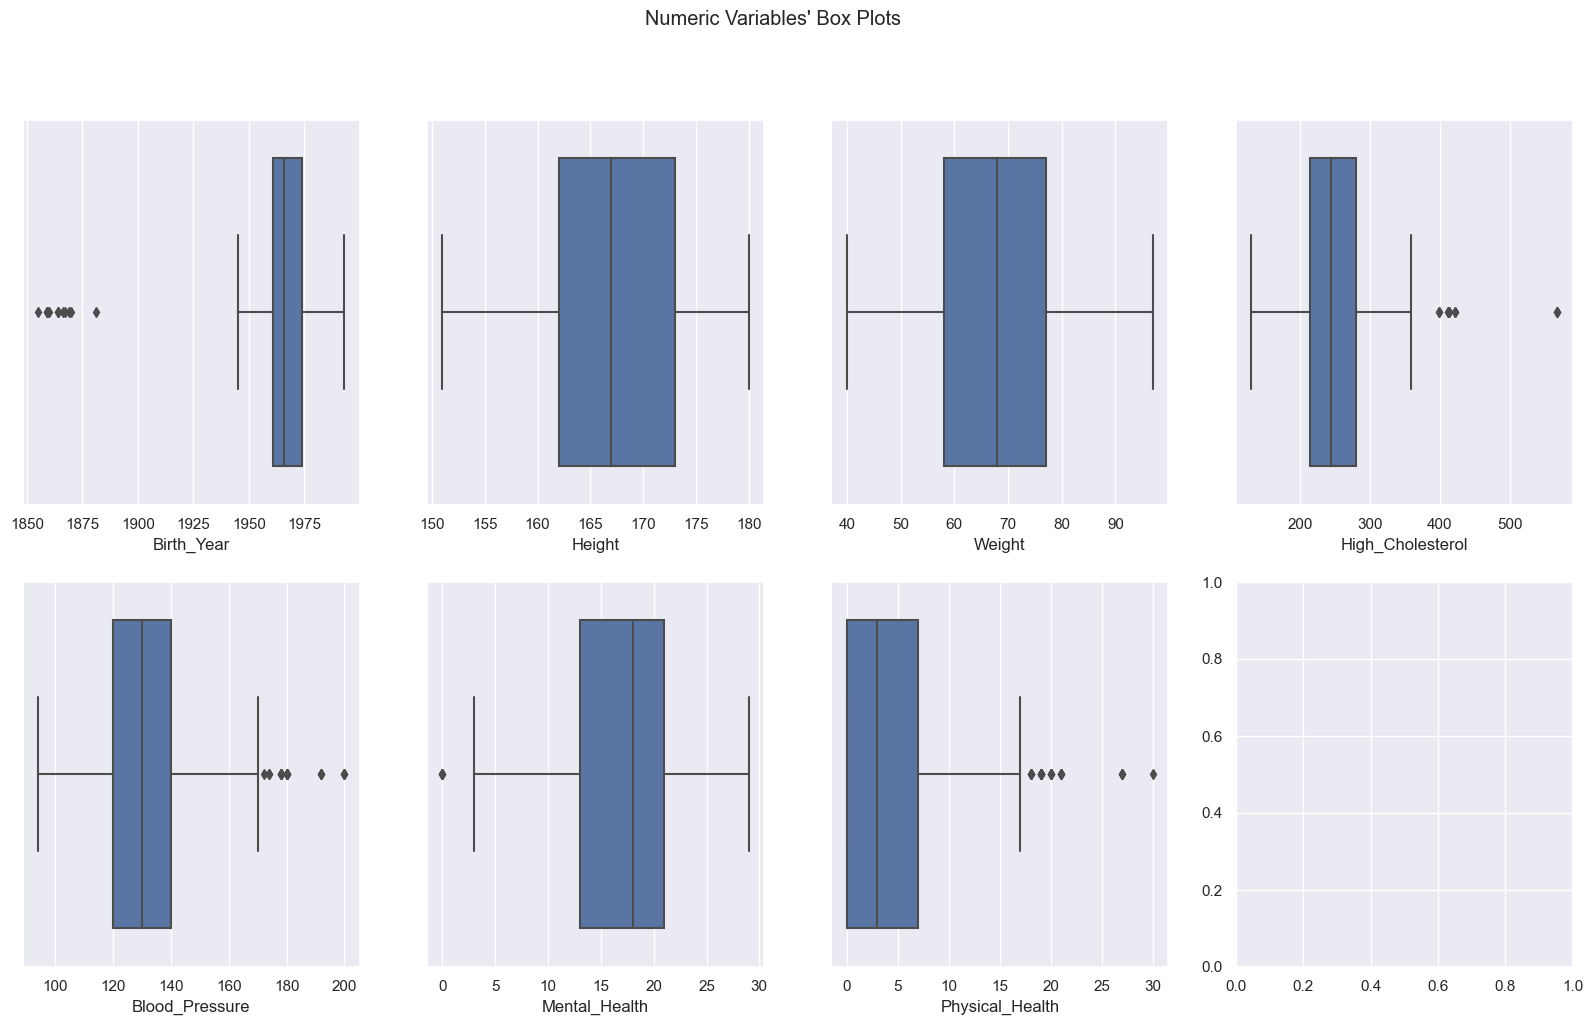

In [284]:
# All Numeric Variables' Box Plots in one figure
sns.set()

fig, axes = plt.subplots(2, ceil(len(X_data_num.columns) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), X_data_num.columns):
    sns.boxplot(x=X_data_num[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [285]:
# Removing Outliers Manually
filters = (
    (data['Birth_Year']>=1920) &
    (data['High_Cholesterol']<=500) &
    (data['Physical_Health']<= 25)
)

data_1 = data[filters]

In [286]:
print('Percentage of data kept after removing outliers:', np.round(data_1.shape[0] / data.shape[0], 4))
# Rule of thumb: it's ok to remove 2-3% of total data when removing outliers

Percentage of data kept after removing outliers: 0.9788


In [287]:
data = data_1.copy()

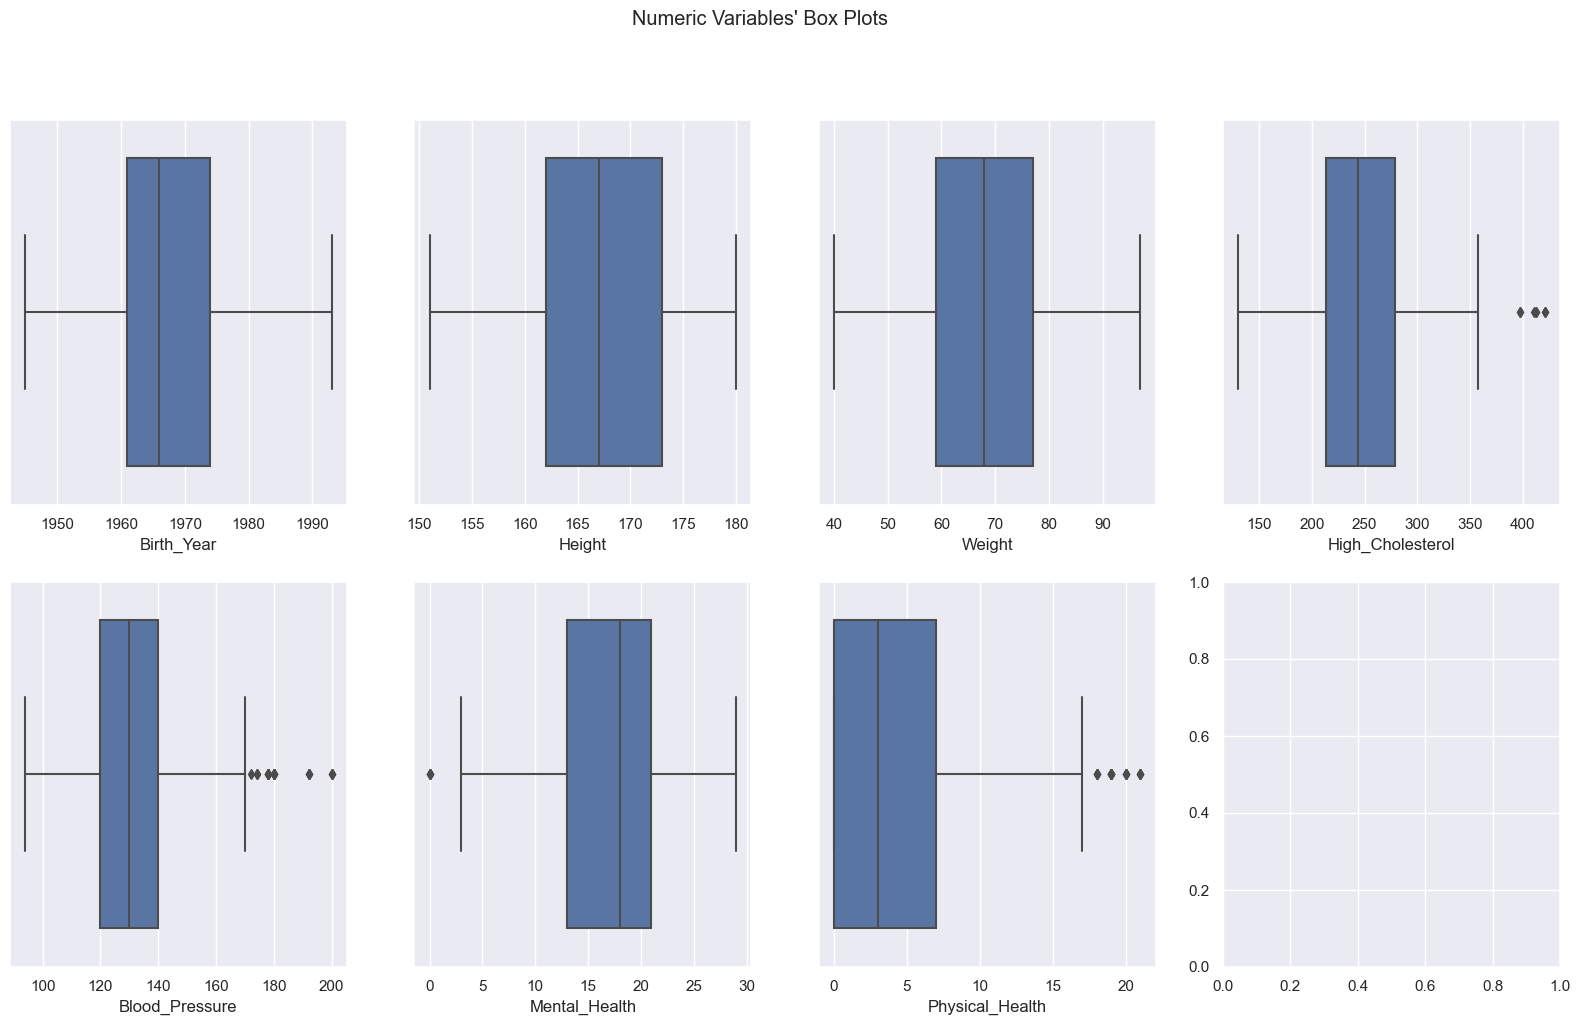

In [288]:
# All Numeric Variables' Box Plots in one figure
sns.set()

fig, axes = plt.subplots(2, ceil(len(X_data_num.columns) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), X_data_num.columns): 
    sns.boxplot(x=data_1[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<a class="anchor" id="4.5">

## 4.5. Correlations
    
</a>

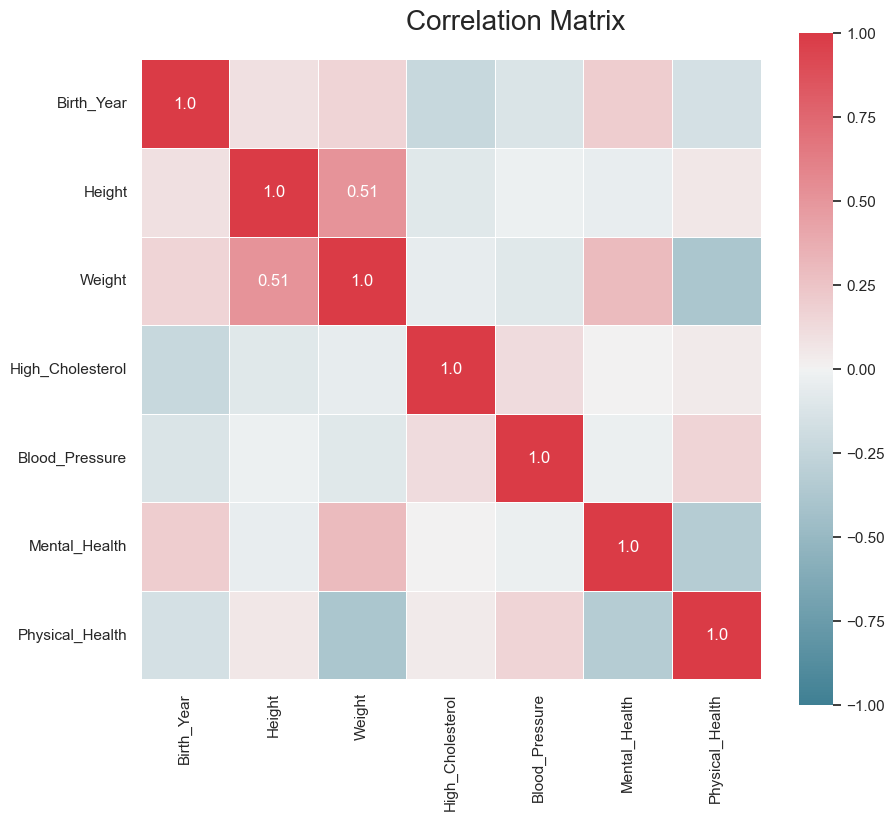

In [289]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(X_data_num.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

<a class="anchor" id="5">

# 5. Feature Engineering
    
</a>

In [290]:
data['Age'] = datetime.now().year - data['Birth_Year']

In [291]:
test['Age'] = datetime.now().year - test['Birth_Year']

In [292]:
X_data_num['Age'] = datetime.now().year - X_data_num['Birth_Year']

In [293]:
X_test_num['Age'] = datetime.now().year - X_test_num['Birth_Year']

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              783 non-null    object
 1   Birth_Year        783 non-null    int64 
 2   Region            783 non-null    object
 3   Education         783 non-null    object
 4   Height            783 non-null    int64 
 5   Weight            783 non-null    int64 
 6   High_Cholesterol  783 non-null    int64 
 7   Blood_Pressure    783 non-null    int64 
 8   Mental_Health     783 non-null    int64 
 9   Physical_Health   783 non-null    int64 
 10  Checkup           783 non-null    object
 11  Diabetes          783 non-null    object
 12  Smoking_Habit     783 non-null    object
 13  Drinking_Habit    783 non-null    object
 14  Exercise          783 non-null    object
 15  Fruit_Habit       783 non-null    object
 16  Water_Habit       783 non-null    object
 17  Age         

In [295]:
X_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Birth_Year        800 non-null    int64
 1   Height            800 non-null    int64
 2   Weight            800 non-null    int64
 3   High_Cholesterol  800 non-null    int64
 4   Blood_Pressure    800 non-null    int64
 5   Mental_Health     800 non-null    int64
 6   Physical_Health   800 non-null    int64
 7   Age               800 non-null    int64
dtypes: int64(8)
memory usage: 56.2 KB


In [296]:
X_test_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Birth_Year        225 non-null    int64
 1   Height            225 non-null    int64
 2   Weight            225 non-null    int64
 3   High_Cholesterol  225 non-null    int64
 4   Blood_Pressure    225 non-null    int64
 5   Mental_Health     225 non-null    int64
 6   Physical_Health   225 non-null    int64
 7   Age               225 non-null    int64
dtypes: int64(8)
memory usage: 15.8 KB


In [297]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              225 non-null    object
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Height            225 non-null    int64 
 5   Weight            225 non-null    int64 
 6   High_Cholesterol  225 non-null    int64 
 7   Blood_Pressure    225 non-null    int64 
 8   Mental_Health     225 non-null    int64 
 9   Physical_Health   225 non-null    int64 
 10  Checkup           225 non-null    object
 11  Diabetes          225 non-null    object
 12  Smoking_Habit     225 non-null    object
 13  Drinking_Habit    225 non-null    object
 14  Exercise          225 non-null    object
 15  Fruit_Habit       225 non-null    object
 16  Water_Habit       225 non-null    object
 17  Age         

In [298]:
data = data.drop(['Birth_Year'],axis=1)

In [299]:
test = test.drop(['Birth_Year'],axis=1)

In [300]:
X_data_num = X_data_num.drop(['Birth_Year'],axis=1)

In [301]:
X_test_num = X_test_num.drop(['Birth_Year'],axis=1)

In [302]:
def separateGenders(row,data,column):
    male = 'Mr.'
    if male in row[column]:
         return 'Male'
    else:
        return 'Female'

    
data['Gender'] = data.apply(lambda row: separateGenders(row,data,'Name'),axis=1)
X_data_cat['Gender'] = X_data_cat.apply(lambda row: separateGenders(row,X_data_cat,'Name'),axis=1)

test['Gender'] = test.apply(lambda row: separateGenders(row,test,'Name'),axis=1)
X_test_cat['Gender'] = X_test_cat.apply(lambda row: separateGenders(row,X_test_cat,'Name'),axis=1)

In [303]:
data = data.drop(['Name'],axis=1)

In [304]:
X_data_cat = X_data_cat.drop(['Name'],axis=1)

In [305]:
test = test.drop(['Name'],axis=1)

In [306]:
X_test_cat = X_test_cat.drop(['Name'],axis=1)

In [307]:
data.loc[data['Region'] == 'LONDON']

,Region,Education,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Age,Gender
PatientID,,,,,,,,,,,,,,,,,
1647,LONDON,High School Graduate,172,66,307,130,11,9,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,No,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,64,Female
1321,LONDON,University Complete (3 or more years),155,70,279,130,15,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,48,Female
1506,LONDON,High School Incomplete (10th to 11th grade),178,75,264,120,15,17,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,61,Male
1763,LONDON,High School Graduate,151,59,287,150,20,4,More than 3 years,"I don't have diabetes, but I have direct famil...",Yes,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,58,Female
1730,LONDON,High School Graduate,178,86,224,120,22,0,More than 3 years,I do have diabetes,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,44,Male


In [308]:
data['Region'].value_counts()

East Midlands               145
London                      134
South West                  106
West Midlands                88
South East                   84
East of England              79
Yorkshire and the Humber     62
North West                   59
North East                   21
LONDON                        5
Name: Region, dtype: int64

In [309]:
data = data.replace(['LONDON'],'London')
test = test.replace(['LONDON'],'London')
X_data_cat = X_data_cat.replace(['LONDON'],'London')
X_test_cat = X_test_cat.replace(['LONDON'],'London')

In [310]:
data.loc[data['Region'] == 'LONDON']

,Region,Education,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Age,Gender
PatientID,,,,,,,,,,,,,,,,,


In [311]:
def mergeFruitHabits(row,data,column):
    do_not_consume = 'Less than 1. I do not consume fruits every day.'
    if do_not_consume in row[column]:
         return do_not_consume
    else:
        return 'More than 1. I consume fruits every day'
    
    

data['Fruit_Habit'] = data.apply(lambda row: mergeFruitHabits(row,data,'Fruit_Habit'),axis=1)
X_data_cat['Fruit_Habit'] = X_data_cat.apply(lambda row: mergeFruitHabits(row,X_data_cat,'Fruit_Habit'),axis=1)

test['Fruit_Habit'] = test.apply(lambda row: mergeFruitHabits(row,test,'Fruit_Habit'),axis=1)
X_test_cat['Fruit_Habit'] = X_test_cat.apply(lambda row: mergeFruitHabits(row,X_test_cat,'Fruit_Habit'),axis=1)

In [312]:
data['Fruit_Habit'].value_counts()

Less than 1. I do not consume fruits every day.    443
More than 1. I consume fruits every day            340
Name: Fruit_Habit, dtype: int64

In [313]:
data['Region'].value_counts()

East Midlands               145
London                      139
South West                  106
West Midlands                88
South East                   84
East of England              79
Yorkshire and the Humber     62
North West                   59
North East                   21
Name: Region, dtype: int64

In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 1167 to 1117
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Region            783 non-null    object
 1   Education         783 non-null    object
 2   Height            783 non-null    int64 
 3   Weight            783 non-null    int64 
 4   High_Cholesterol  783 non-null    int64 
 5   Blood_Pressure    783 non-null    int64 
 6   Mental_Health     783 non-null    int64 
 7   Physical_Health   783 non-null    int64 
 8   Checkup           783 non-null    object
 9   Diabetes          783 non-null    object
 10  Smoking_Habit     783 non-null    object
 11  Drinking_Habit    783 non-null    object
 12  Exercise          783 non-null    object
 13  Fruit_Habit       783 non-null    object
 14  Water_Habit       783 non-null    object
 15  Age               783 non-null    int64 
 16  Gender            783 non-null    object
dtypes: int64(7),

In [315]:
X_data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Height            800 non-null    int64
 1   Weight            800 non-null    int64
 2   High_Cholesterol  800 non-null    int64
 3   Blood_Pressure    800 non-null    int64
 4   Mental_Health     800 non-null    int64
 5   Physical_Health   800 non-null    int64
 6   Age               800 non-null    int64
dtypes: int64(7)
memory usage: 50.0 KB


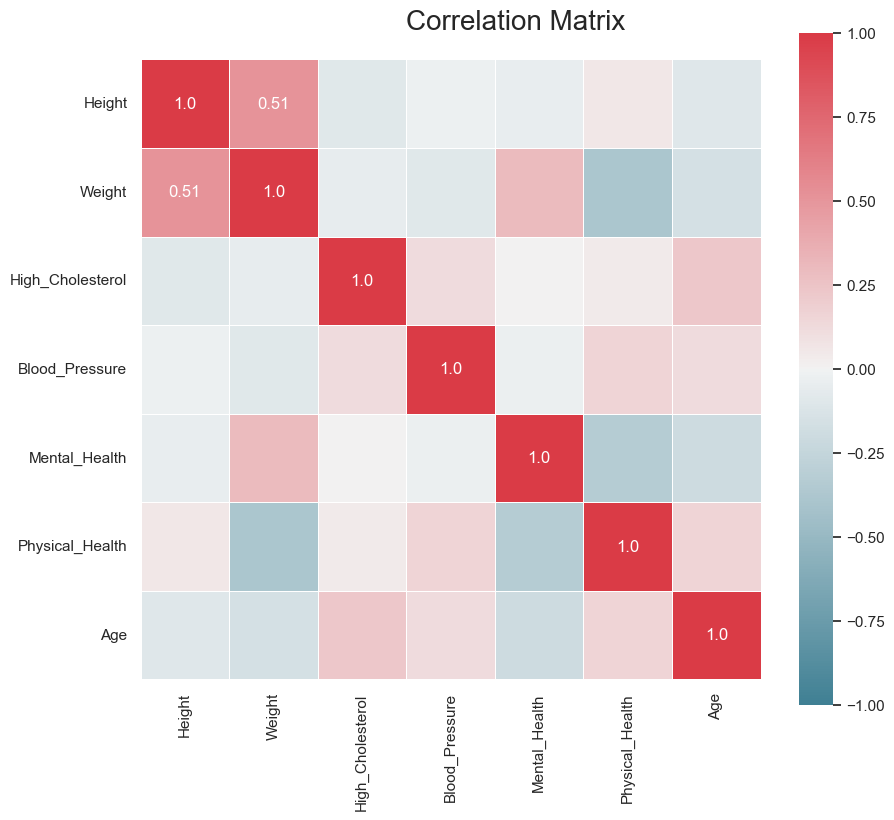

In [316]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(X_data_num.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

#plt.savefig(os.path.join('..', 'figures', 'correlation_matrix.png'), dpi=200)

plt.show()

<a class="anchor" id="6">

# 6. Data Normalization
    
</a>


<a class="anchor" id="6.1">

## 6.1. Train Dataset
    
</a>

In [317]:
scaler = MinMaxScaler()
scaled = scaler.fit(X_data_num)
scaled_feat_train = scaled.transform(X_data_num)

In [318]:
X_data_num.columns

Index(['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure',
       'Mental_Health', 'Physical_Health', 'Age'],
      dtype='object')

In [319]:
data_1 = data.drop(X_data_num.columns,axis=1)

In [320]:
df_num_scaled_data = pd.DataFrame(scaled_feat_train, index=X_data_num.index, columns=X_data_num.columns)  # Why the index=df_ohc.index?
df_num_scaled_data

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age
PatientID,,,,,,,
1167,0.137931,0.473684,0.520548,0.245283,0.724138,0.066667,0.202899
1805,0.758621,0.842105,0.228311,0.452830,0.310345,0.000000,0.173913
1557,0.379310,0.491228,0.219178,0.264151,0.896552,0.000000,0.137681
1658,1.000000,0.456140,0.417808,0.292453,0.448276,0.266667,0.253623
1544,1.000000,0.315789,0.335616,0.292453,0.620690,0.066667,0.181159
...,...,...,...,...,...,...,...
1909,0.931034,0.368421,0.168950,0.471698,0.413793,0.133333,0.152174
1386,0.206897,0.368421,0.189498,0.245283,0.793103,0.000000,0.094203
1088,0.551724,0.140351,0.324201,0.433962,0.689655,0.566667,0.963768


In [321]:
data_scaled = df_num_scaled_data.copy()

In [322]:
data_1.head()

,Region,Education,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Gender
PatientID,,,,,,,,,,
1167,London,High School Incomplete (10th to 11th grade),More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Female
1805,South West,High School Incomplete (10th to 11th grade),Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Male
1557,Yorkshire and the Humber,Elementary School (1st to 9th grade),More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Male
1658,London,University Complete (3 or more years),Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Male
1544,South East,University Incomplete (1 to 2 years),More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,More than 1. I consume fruits every day,More than half a liter but less than one liter,Male


In [323]:
X_data_metric_scaled = pd.concat([data_1, df_num_scaled_data], axis=1)
X_data_metric_scaled.head()

,Region,Education,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Gender,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age
PatientID,,,,,,,,,,,,,,,,,
1167,London,High School Incomplete (10th to 11th grade),More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Female,0.137931,0.473684,0.520548,0.245283,0.724138,0.066667,0.202899
1805,South West,High School Incomplete (10th to 11th grade),Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Male,0.758621,0.842105,0.228311,0.452830,0.310345,0.000000,0.173913
1557,Yorkshire and the Humber,Elementary School (1st to 9th grade),More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Male,0.379310,0.491228,0.219178,0.264151,0.896552,0.000000,0.137681
1658,London,University Complete (3 or more years),Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Male,1.000000,0.456140,0.417808,0.292453,0.448276,0.266667,0.253623
1544,South East,University Incomplete (1 to 2 years),More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,More than 1. I consume fruits every day,More than half a liter but less than one liter,Male,1.000000,0.315789,0.335616,0.292453,0.620690,0.066667,0.181159


<a class="anchor" id="6.2">

## 6.2. Test Dataset
    
</a>

In [324]:
test_1 = test.drop(X_test_num.columns,axis=1)

In [325]:
X_test_num.columns

Index(['Height', 'Weight', 'High_Cholesterol', 'Blood_Pressure',
       'Mental_Health', 'Physical_Health', 'Age'],
      dtype='object')

In [326]:
scaler = MinMaxScaler()
scaled = scaler.fit(X_data_num)

In [327]:
scaled_feat_test = scaled.transform(X_test_num)

In [328]:
df_num_scaled_test = pd.DataFrame(scaled_feat_test, index=X_test_num.index, columns=X_test_num.columns)  # Why the index=df_ohc.index?
df_num_scaled_test.sample(20)

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age
PatientID,,,,,,,
1189,0.793103,0.333333,0.417808,0.292453,0.448276,0.266667,0.253623
1040,0.241379,0.543860,0.534247,0.622642,0.620690,0.100000,0.260870
1306,0.137931,0.298246,0.264840,0.226415,0.586207,0.033333,0.108696
1417,0.758621,0.649123,0.221461,0.415094,0.758621,0.000000,0.166667
1997,1.000000,0.543860,0.141553,0.245283,0.310345,0.200000,0.181159
1504,0.758621,0.614035,0.267123,0.132075,0.620690,0.000000,0.130435
1969,0.724138,0.596491,0.454338,0.245283,0.793103,0.000000,0.166667
1174,0.689655,0.368421,0.257991,0.150943,0.413793,0.433333,0.181159
1332,0.793103,0.263158,0.283105,0.339623,0.896552,0.533333,0.057971


In [329]:
X_test_num_scaled = df_num_scaled_test.copy()

In [330]:
X_test_metric_scaled = pd.concat([test_1, df_num_scaled_test], axis=1)
X_test_metric_scaled.head()

,Region,Education,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Gender,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age
PatientID,,,,,,,,,,,,,,,,,
1343,East Midlands,Elementary School (1st to 9th grade),Not sure,I have/had pregnancy diabetes or borderline di...,Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Male,0.724138,0.701754,0.166667,0.735849,0.689655,0.066667,0.166667
1727,Yorkshire and the Humber,University Complete (3 or more years),Not sure,I do have diabetes,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Male,0.689655,0.701754,0.216895,0.339623,0.724138,0.000000,0.195652
1828,West Midlands,High School Incomplete (10th to 11th grade),More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Male,0.689655,0.666667,0.244292,0.339623,0.827586,0.033333,0.108696
1155,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),Not sure,I do have diabetes,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Less than half a liter,Male,0.793103,0.824561,0.417808,0.132075,0.655172,0.000000,0.181159
1020,East Midlands,High School Incomplete (10th to 11th grade),More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Less than half a liter,Male,0.724138,0.280702,0.134703,0.433962,0.655172,0.466667,0.224638



<a class="anchor" id="6.3">

## 6.3. One Hot Encoding
    
</a>

In [331]:
ohc = OneHotEncoder(sparse=False,drop='first')
ohc_feat = ohc.fit(X_data_cat)
ohc_feat_transform = ohc_feat.transform(X_data_cat)
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat_transform, index=X_data_cat.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df

,Region_East of England,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,Region_Yorkshire and the Humber,Education_High School Graduate,Education_High School Incomplete (10th to 11th grade),...,Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.,Smoking_Habit_Yes,Drinking_Habit_I do not consume any type of alcohol,Drinking_Habit_I usually consume alcohol every day,Exercise_Yes,Fruit_Habit_More than 1. I consume fruits every day,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Gender_Male
PatientID,,,,,,,,,,,,,,,,,,,,,
1167,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1805,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1658,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1544,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1386,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [332]:
X_data_cat_scaled = ohc_df.copy()

In [333]:
X_data_ohe = pd.concat([X_data_num,ohc_df],axis =1)
X_data_ohe.head()

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,Region_East of England,Region_London,Region_North East,...,Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.,Smoking_Habit_Yes,Drinking_Habit_I do not consume any type of alcohol,Drinking_Habit_I usually consume alcohol every day,Exercise_Yes,Fruit_Habit_More than 1. I consume fruits every day,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Gender_Male
PatientID,,,,,,,,,,,,,,,,,,,,,
1167,155,67,358,120,21,2,57,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1805,173,88,230,142,9,0,53,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1557,162,68,226,122,26,0,48,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1658,180,66,313,125,13,8,64,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1544,180,58,277,125,18,2,54,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [334]:
all_data_scaled = pd.concat([data_scaled, ohc_df], axis=1)
all_data_scaled.head()

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,Region_East of England,Region_London,Region_North East,...,Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.,Smoking_Habit_Yes,Drinking_Habit_I do not consume any type of alcohol,Drinking_Habit_I usually consume alcohol every day,Exercise_Yes,Fruit_Habit_More than 1. I consume fruits every day,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Gender_Male
PatientID,,,,,,,,,,,,,,,,,,,,,
1167,0.137931,0.473684,0.520548,0.245283,0.724138,0.066667,0.202899,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1805,0.758621,0.842105,0.228311,0.452830,0.310345,0.000000,0.173913,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1557,0.379310,0.491228,0.219178,0.264151,0.896552,0.000000,0.137681,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1658,1.000000,0.456140,0.417808,0.292453,0.448276,0.266667,0.253623,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1544,1.000000,0.315789,0.335616,0.292453,0.620690,0.066667,0.181159,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [335]:
ohc_test = OneHotEncoder(sparse=False,drop='first')
ohc_feat_test = ohc.fit(X_test_cat)
ohc_feat_transform_test = ohc_feat.transform(X_test_cat)
ohc_feat_names_test = ohc.get_feature_names_out()
ohc_df_test = pd.DataFrame(ohc_feat_transform_test, index=X_test_cat.index, columns=ohc_feat_names_test)  # Why the index=df_ohc.index?
ohc_df_test

,Region_East of England,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,Region_Yorkshire and the Humber,Education_High School Graduate,Education_High School Incomplete (10th to 11th grade),...,Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.,Smoking_Habit_Yes,Drinking_Habit_I do not consume any type of alcohol,Drinking_Habit_I usually consume alcohol every day,Exercise_Yes,Fruit_Habit_More than 1. I consume fruits every day,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Gender_Male
PatientID,,,,,,,,,,,,,,,,,,,,,
1343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1828,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
1256,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


In [336]:
X_test_cat_scaled = ohc_df_test.copy()

In [337]:
data_test_scaled = pd.concat([X_test_num_scaled, ohc_df_test], axis=1)
data_test_scaled.head()

,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,Region_East of England,Region_London,Region_North East,...,Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.,Smoking_Habit_Yes,Drinking_Habit_I do not consume any type of alcohol,Drinking_Habit_I usually consume alcohol every day,Exercise_Yes,Fruit_Habit_More than 1. I consume fruits every day,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter,Gender_Male
PatientID,,,,,,,,,,,,,,,,,,,,,
1343,0.724138,0.701754,0.166667,0.735849,0.689655,0.066667,0.166667,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1727,0.689655,0.701754,0.216895,0.339623,0.724138,0.000000,0.195652,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1828,0.689655,0.666667,0.244292,0.339623,0.827586,0.033333,0.108696,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1155,0.793103,0.824561,0.417808,0.132075,0.655172,0.000000,0.181159,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1020,0.724138,0.280702,0.134703,0.433962,0.655172,0.466667,0.224638,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0



<a class="anchor" id="7">

# 7. Feature Selection
    
</a>


<a class="anchor" id="7.1">

## 7.1. Chi Square for categorical data
    
</a>

In [338]:
def TestIndependence(X,y,var,alpha=0.05):
    p_values = []
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    return p

        P Value        Features
0  9.921162e-01          Region
1  1.388505e-01       Education
2  7.504922e-48         Checkup
3  6.173659e-41        Diabetes
4  1.113095e-01   Smoking_Habit
5  8.511928e-09  Drinking_Habit
6  1.161343e-31        Exercise
7  7.429201e-39     Fruit_Habit
8  9.555575e-01     Water_Habit
9  1.765276e-16          Gender


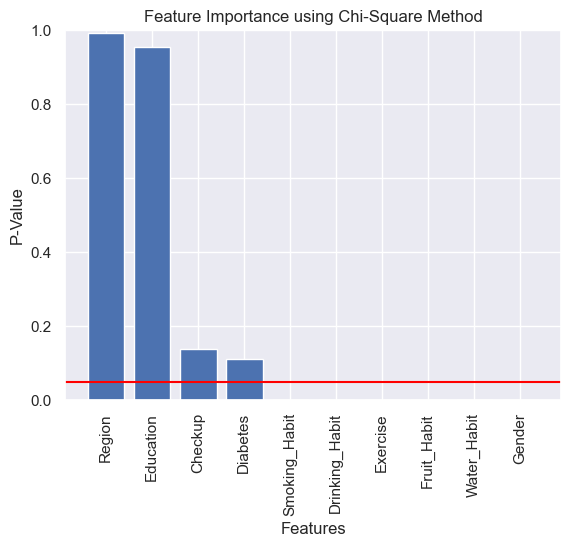

In [339]:
list_values = []
list_p = []
list_feat = []
for var in data.drop(columns=X_data_num.columns):
    p = TestIndependence(data[var],target, var)
    new_tuple = (p,var)
    list_p.append(p)
    list_feat.append(var)
    list_values.append(new_tuple)
    
df = pd.DataFrame(list_values, columns = ['P Value', 'Features'])
print(df)
values_plot = pd.Series(list_p).sort_values(ascending = False)
#sns.barplot(x='Features', y='P Value', data=df,errorbar=('ci', 95),width=0.3,capsize=1)
#matplotlib.pyplot.bar(list_feat,list_p, 100, 100)
plt.bar(list_feat,values_plot)
plt.ylim(0,1)
plt.xlabel('Features')
plt.ylabel('P-Value')
plt.title('Feature Importance using Chi-Square Method')
plt.xticks(rotation='vertical')
#plt.yticks(1)
plt.axhline(y=0.05,color='red')


<a class="anchor" id="7.2">

## 7.2. Mutual Information
    
</a>

In [340]:
values = pd.Series(mutual_info_classif(X_data_cat_scaled, target,random_state=15))

In [341]:
X_data_cat.head()

,Region,Education,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Gender
PatientID,,,,,,,,,,
1167,London,High School Incomplete (10th to 11th grade),More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Female
1805,South West,High School Incomplete (10th to 11th grade),Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Male
1557,Yorkshire and the Humber,Elementary School (1st to 9th grade),More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Male
1658,London,University Complete (3 or more years),Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,Male
1544,South East,University Incomplete (1 to 2 years),More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,More than 1. I consume fruits every day,More than half a liter but less than one liter,Male


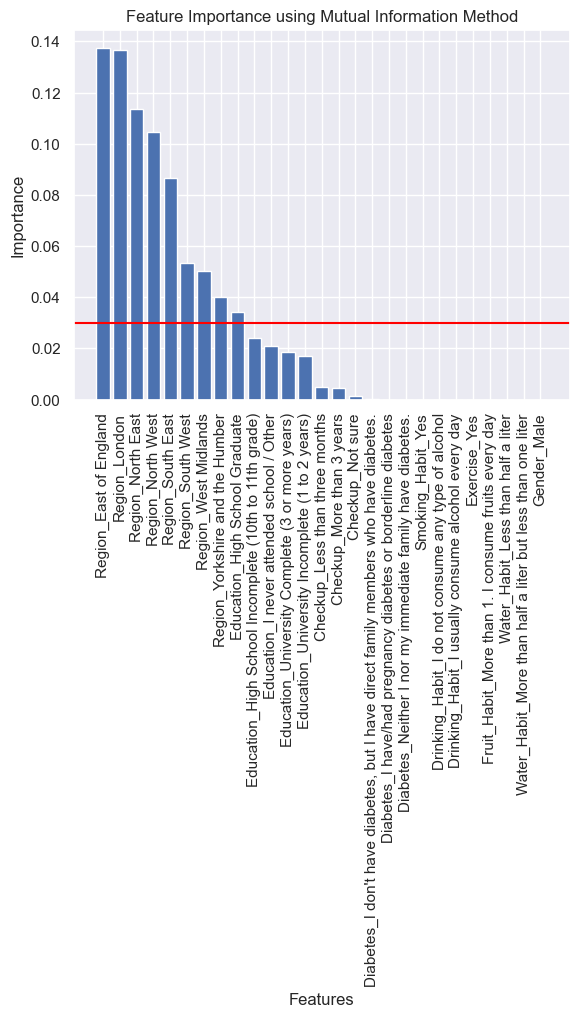

In [342]:
pyplot.bar([i for i in X_data_cat_scaled], values.sort_values(ascending = False))
plt.xticks(rotation='vertical')
plt.axhline(y=0.03,color='red')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance using Mutual Information Method')
pyplot.show()

<hr>


### Categorical Data

| Predictor | Chi-Square | Mutual Information | Final Decision |
| --- | --- | --- | --- |
| Region | Discard | Discard | Discard |
| Education | Discard | Discard | Discard |
| Diabetes | Discard | Keep | Keep |
| Drinking Habit | Keep | Keep | Keep |
| Fruit Habit | Keep | Keep | Keep |
| Water Habit | Keep | Discard | Discard |
| Gender | Keep | Keep | Keep |
| Checkup | Discard | Keep | Keep |
| Smoking Habit | Keep | Discard | Discard |
| Exercise | Keep | Keep | Keep |

<hr>



<a class="anchor" id="7.3">

## 7.3. Univariate Features
    
</a>

In [343]:
data.var()

Height                63.271394
Weight               145.468942
High_Cholesterol    2259.066882
Blood_Pressure       291.495824
Mental_Health         29.203310
Physical_Health       26.908275
Age                   80.940582
dtype: float64


<a class="anchor" id="7.4">

## 7.4. RIDGE Regression Method
    
</a>

In [344]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = Ridge(alpha=1.0)
clf_fited = clf.fit(data_scaled,target)
Ridge()

Ridge()

In [345]:
ridge_logit = LogisticRegression(C=1,penalty='l2')
ridge_logit.fit(data_scaled,target)

LogisticRegression(C=1)

In [346]:
ridge_logit.coef_

array([[-1.59321712,  0.71688609, -0.92675851, -1.46300175,  3.3589693 ,
        -3.68974   , -0.93935053]])

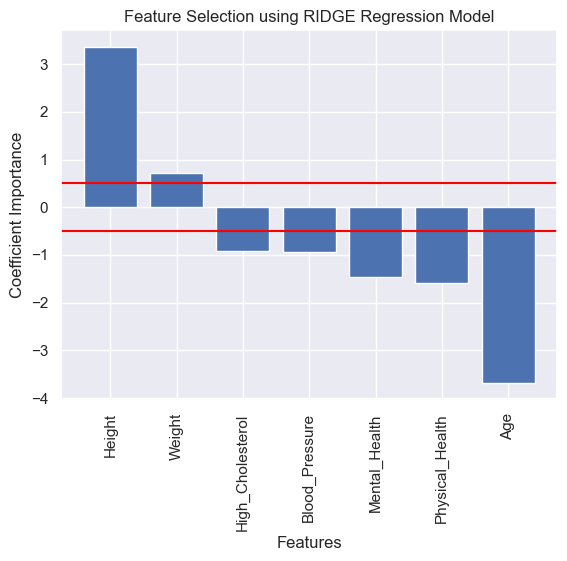

In [347]:
importance = pd.Series(ridge_logit.coef_[0]).sort_values(ascending = False)
plt.title("Feature Selection using RIDGE Regression Model")
plt.xlabel('Features')
plt.ylabel('Coefficient Importance')
plt.bar(data_scaled.columns,importance)
plt.xticks(rotation='vertical')
plt.axhline(y=0.5, color = 'red')
plt.axhline(y=-0.5, color = 'red')



<a class="anchor" id="7.5">

## 7.5. Lasso Regression Method
    
</a>

In [348]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values(ascending = False)
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "bar")
    plt.title("Feature importance using " + name + " Model")
    plt.ylabel('Coefficient Importance')
    plt.xlabel('Features')
    plt.show()

In [349]:
lasso = LassoCV()

In [350]:
lasso.fit(data_scaled, target)

LassoCV()

In [351]:
coef = pd.Series(lasso.coef_, index = data_scaled.columns)
coef

Height             -0.318430
Weight              0.108122
High_Cholesterol   -0.234489
Blood_Pressure     -0.312196
Mental_Health       0.777593
Physical_Health    -0.804820
Age                -0.172599
dtype: float64

In [352]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 0 variables


In [353]:
coef.sort_values(ascending = False)

Mental_Health       0.777593
Weight              0.108122
Age                -0.172599
High_Cholesterol   -0.234489
Blood_Pressure     -0.312196
Height             -0.318430
Physical_Health    -0.804820
dtype: float64

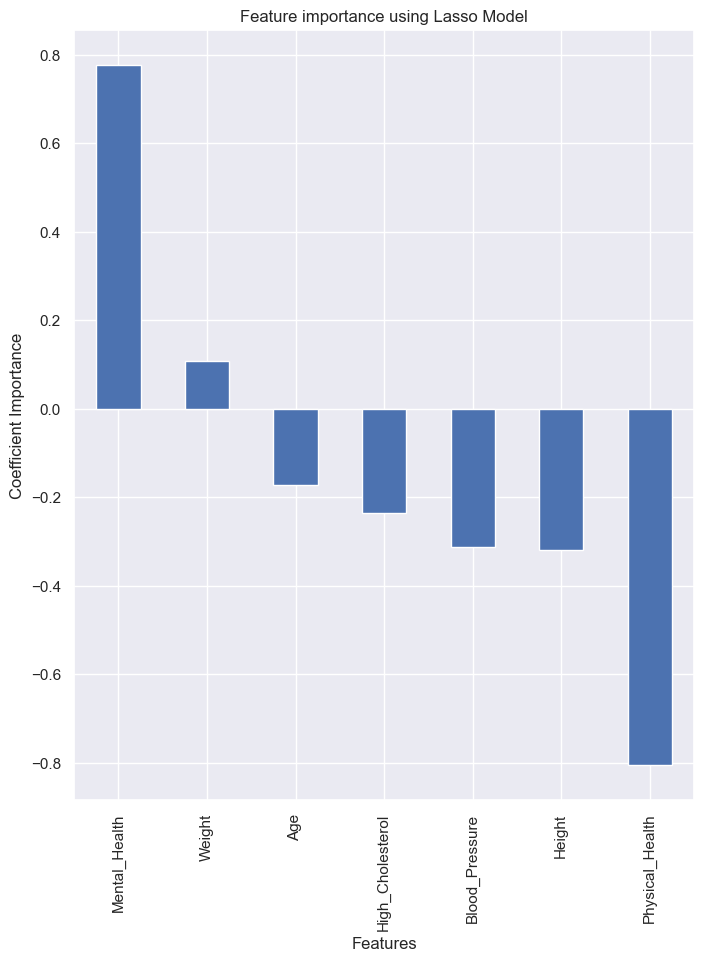

In [354]:
plot_importance(coef,'Lasso')

In [355]:
# with Lasso Regression we remove the features that have coefficient 0.


<a class="anchor" id="7.6">

## 7.6. Decision Tree Method
    
</a>

In [356]:
gini_importance = DecisionTreeClassifier().fit(X_data_num, target).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_data_num, target).feature_importances_

Text(0.5, 1.0, 'Feature Importance using Decision Tree Method')

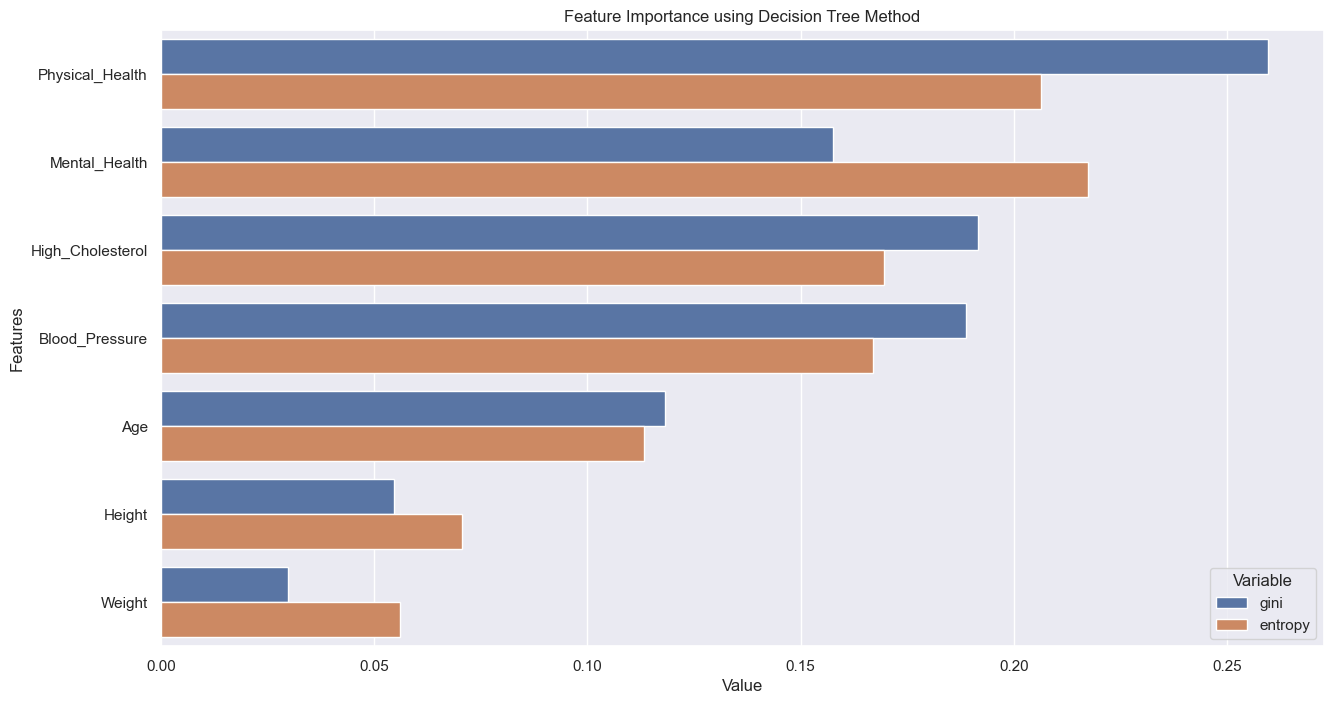

In [357]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['Features'] = X_data_num.columns
tidy = zippy.melt(id_vars='Features').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Features',x='Value',hue='Variable',data=tidy)
plt.title('Feature Importance using Decision Tree Method')

<a class="anchor" id="7.7">

## 7.7. ANOVA Method
    
</a>

Adapted from: https://ml2021.medium.com/chi-square-and-anova-feature-selection-for-ml-5e1063ab0991

In [358]:
univariate = f_classif(X_data_num,target)

In [359]:
univariate

(array([ 23.97335739,  25.26030009,   4.5559546 ,  22.81592164,
        168.81861829, 193.35082497,  20.70493089]),
 array([1.18245925e-06, 6.18661347e-07, 3.31086097e-02, 2.12146166e-06,
        3.74741774e-35, 1.61422063e-39, 6.19137712e-06]))

In [360]:
univariate = pd.Series(univariate[1])
univariate.index = X_data_num.columns

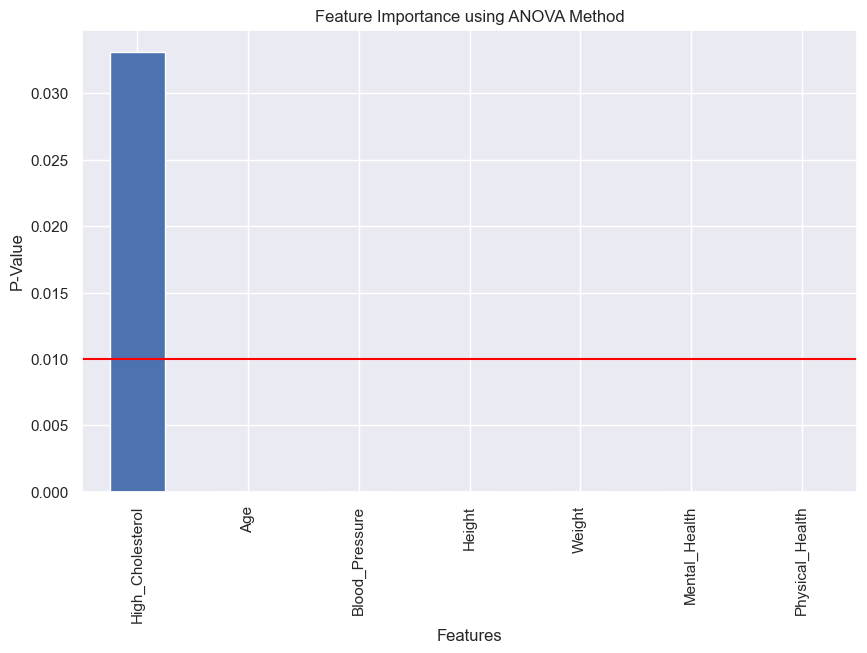

In [361]:
univariate.sort_values(ascending=False).plot.bar(figsize=(10,6))
plt.xlabel('Features')
plt.ylabel('P-Value')
plt.title('Feature Importance using ANOVA Method')
plt.axhline(y=0.01, color = 'red')

<a class="anchor" id="7.8">

## 7.8. RFE
    
</a>


<a class="anchor" id="7.8.1">

### 7.8.1. For Logistic Regression
    
</a>

In [362]:
model = LogisticRegression()

In [363]:
#no of features
nof_list=list(range(1,9))
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in nof_list:
    model = LogisticRegression()
    rfe = RFE(n_features_to_select = n,estimator = model)
    X_train_rfe = rfe.fit_transform(X_data_num,target)
    model.fit(X_train_rfe,target)
    
    score = model.score(X_train_rfe,target)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 8
Score with 8 features: 0.730000


In [364]:
rfe = RFE(estimator = model, n_features_to_select = 8)
X_rfe = rfe.fit_transform(X = X_data_num, y = target)
selected_features = pd.Series(rfe.support_, index = X_data_num.columns)
selected_features

Height              True
Weight              True
High_Cholesterol    True
Blood_Pressure      True
Mental_Health       True
Physical_Health     True
Age                 True
dtype: bool

<a class="anchor" id="7.8.2">

### 7.8.2. For Decision Tree
    
</a>

In [365]:
model = DecisionTreeClassifier()

In [366]:
#no of features
nof_list=list(range(1,15))
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in nof_list:
    model = DecisionTreeClassifier()
    rfe = RFE(n_features_to_select = n,estimator = model)
    X_data_rfe = rfe.fit_transform(X_data_num,target)
    model.fit(X_data_rfe,target)
    
    score = model.score(X_data_rfe,target)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 1.000000


In [367]:
rfe = RFE(estimator = model, n_features_to_select = 5 )
X_rfe = rfe.fit_transform(X = X_data_num, y = target)
selected_features = pd.Series(rfe.support_, index = X_data_num.columns)
selected_features

Height              False
Weight              False
High_Cholesterol     True
Blood_Pressure       True
Mental_Health        True
Physical_Health      True
Age                  True
dtype: bool

<a class="anchor" id="7.8.3">

### 7.8.3. For Gradient Boosting
    
</a>

In [368]:
model = GradientBoostingClassifier()

In [369]:
#no of features
nof_list=list(range(1,15))
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in nof_list:
    model = DecisionTreeClassifier()
    rfe = RFE(n_features_to_select = n,estimator = model)
    X_data_rfe = rfe.fit_transform(X_data_num,target)
    model.fit(X_data_rfe,target)
    
    score = model.score(X_data_rfe,target)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 1.000000


In [370]:
rfe = RFE(estimator = model, n_features_to_select = 5 )
X_rfe = rfe.fit_transform(X = X_data_num, y = target)
selected_features = pd.Series(rfe.support_, index = X_data_num.columns)
selected_features

Height              False
Weight              False
High_Cholesterol     True
Blood_Pressure       True
Mental_Health        True
Physical_Health      True
Age                  True
dtype: bool

<a class="anchor" id="7.8.4">

### 7.8.4. For Random Forest
    
</a>

In [371]:
#same output as gradient boosting, however we did it 
model = RandomForestClassifier()

In [372]:
#no of features
nof_list=list(range(1,15))
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in nof_list:
    model = DecisionTreeClassifier()
    rfe = RFE(n_features_to_select = n,estimator = model)
    X_data_rfe = rfe.fit_transform(X_data_num,target)
    model.fit(X_data_rfe,target)
    
    score = model.score(X_data_rfe,target)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 1.000000


In [373]:
rfe = RFE(estimator = model, n_features_to_select = 5 )
X_rfe = rfe.fit_transform(X = X_data_num, y = target)
selected_features = pd.Series(rfe.support_, index = X_data_num.columns)
selected_features

Height              False
Weight              False
High_Cholesterol     True
Blood_Pressure       True
Mental_Health        True
Physical_Health      True
Age                  True
dtype: bool

<hr>

### Numerical Data

| Predictor | RIDGE | Lasso | Decision Tree | RFE - LR | RFE - DT | RFE - GB | RFE - RF | ANOVA | Final Decision |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Height | Keep | Keep | Discard | Keep | Discard | Discard | Discard | Keep | Discard |
| Weight | Discard | Keep | Discard | Keep | Discard | Discard | Discard | Keep | Discard |
| High Cholesterol | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Discard | Keep |
| Blood Pressure | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
| Mental Health | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep | Keep |
| Physical Health | Keep | Keep | Keep |  Keep | Keep | Keep | Keep | Keep | Keep |
| Age | Keep | Keep | Keep |  Keep | Keep | Keep | Keep | Keep | Keep |

<hr>


<a class="anchor" id="7.9">

## 7.9. Final Feature Selection
    
</a>

In [374]:
features_to_remove = ['Height','Weight']

In [375]:
new_data = all_data_scaled.drop(features_to_remove,axis = 1)

In [376]:
new_test_data = data_test_scaled.drop(features_to_remove,axis = 1)

In [377]:
data_columns = new_data.columns[~new_data.columns.str.startswith('Region') & ~new_data.columns.str.startswith('Education') & ~new_data.columns.str.startswith('Water_Habit') & ~new_data.columns.str.startswith('Smoking_Habit')]
data_columns2 = new_test_data.columns[~new_data.columns.str.startswith('Region') & ~new_data.columns.str.startswith('Education') & ~new_data.columns.str.startswith('Water_Habit') & ~new_data.columns.str.startswith('Smoking_Habit')]

In [378]:
final_train_data = new_data[data_columns]

In [379]:
final_test_data = new_test_data[data_columns2]

In [380]:
final_train_data.head()

,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.,Drinking_Habit_I do not consume any type of alcohol,Drinking_Habit_I usually consume alcohol every day,Exercise_Yes,Fruit_Habit_More than 1. I consume fruits every day,Gender_Male
PatientID,,,,,,,,,,,,,,,,
1167,0.520548,0.245283,0.724138,0.066667,0.202899,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1805,0.228311,0.452830,0.310345,0.000000,0.173913,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1557,0.219178,0.264151,0.896552,0.000000,0.137681,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1658,0.417808,0.292453,0.448276,0.266667,0.253623,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1544,0.335616,0.292453,0.620690,0.066667,0.181159,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [381]:
final_test_data.head()

,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Age,Checkup_Less than three months,Checkup_More than 3 years,Checkup_Not sure,"Diabetes_I don't have diabetes, but I have direct family members who have diabetes.",Diabetes_I have/had pregnancy diabetes or borderline diabetes,Diabetes_Neither I nor my immediate family have diabetes.,Drinking_Habit_I do not consume any type of alcohol,Drinking_Habit_I usually consume alcohol every day,Exercise_Yes,Fruit_Habit_More than 1. I consume fruits every day,Gender_Male
PatientID,,,,,,,,,,,,,,,,
1343,0.166667,0.735849,0.689655,0.066667,0.166667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1727,0.216895,0.339623,0.724138,0.000000,0.195652,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1828,0.244292,0.339623,0.827586,0.033333,0.108696,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1155,0.417808,0.132075,0.655172,0.000000,0.181159,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1020,0.134703,0.433962,0.655172,0.466667,0.224638,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0



<a class="anchor" id="8">

# 8. Model Selection
    
</a>

In [382]:
X = final_train_data.copy()
y = target.copy()
def avg_score(model):
    # apply kfold
    skf = StratifiedKFold(n_splits=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    timer = []
    f1_train = []
    f1_test = []
    for train_index, test_index in skf.split(X,y):
        # get the indexes of the observations assigned for each partition
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # start counting time
        begin = time.perf_counter()
        # fit the model to the data
        model_fitted = model.fit(X_train, y_train)
        predictions_train = model_fitted.predict(X_train)
        predictions_test = model_fitted.predict(X_test)
        # finish counting time
        end = time.perf_counter()
        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        f1_train_value = f1_score(y_train,predictions_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)
        f1_test_value = f1_score(y_test,predictions_test)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        f1_train.append(f1_train_value)
        f1_test.append(f1_test_value)
        timer.append(end-begin)
    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    avg_f1_train = round(np.mean(f1_train),3)
    avg_f1_test = round(np.mean(f1_test),3)
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    std_f1_train = round(np.std(f1_train),2)
    std_f1_test = round(np.std(f1_test),2)
    
    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_f1_train) + '+/-' + str(std_f1_train),str(avg_test) + '+/-' + str(std_test),str(avg_f1_test) + '+/-' + str(std_f1_test)

In [383]:
def show_results(df, *args):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_score_train, avg_f1_train, avg_test, avg_f1_test = avg_score(arg)
        # store the results in the right row
        df.iloc[count] = time, avg_score_train,avg_f1_train, avg_test, avg_f1_test
        count+=1
    return df


<a class="anchor" id="8.1">

## 8.1. Logistic Regression Model
    
</a>

In [384]:
log_model = LogisticRegression()

In [385]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['Simple'])
show_results(df, log_model)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
Simple,0.046+/-0.0,0.874+/-0.0,0.879+/-0.0,0.867+/-0.03,0.873+/-0.03


In [386]:
final_log_model = LogisticRegression().fit(final_train_data,target)


<a class="anchor" id="8.2">

## 8.2. Naive Bayes - Gaussian
    
</a>

In [387]:
modelNB = GaussianNB(var_smoothing = 0.0001)

In [388]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['Gaussian'])
show_results(df, modelNB)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
Gaussian,0.007+/-0.0,0.851+/-0.0,0.86+/-0.0,0.84+/-0.03,0.85+/-0.03


In [389]:
final_modelNB = GaussianNB(var_smoothing = 0.0001).fit(final_train_data,target)


<a class="anchor" id="8.3">

## 8.3. K Nearest Neighbors Model 
    
</a>

In [390]:
modelKNN_1N = KNeighborsClassifier(n_neighbors=1)
modelKNN_2N = KNeighborsClassifier(n_neighbors=2)
modelKNN_3N = KNeighborsClassifier(n_neighbors=3)
modelKNN_4N = KNeighborsClassifier(n_neighbors=4)
modelKNN_5N = KNeighborsClassifier(n_neighbors=5)

In [391]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['1N','2N','3N','4N','5N'])
show_results(df, modelKNN_1N,modelKNN_2N,modelKNN_3N,modelKNN_4N,modelKNN_5N)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
1N,0.109+/-0.01,1.0+/-0.0,1.0+/-0.0,0.988+/-0.02,0.988+/-0.02
2N,0.105+/-0.0,0.992+/-0.0,0.992+/-0.0,0.951+/-0.03,0.95+/-0.03
3N,0.106+/-0.0,0.986+/-0.0,0.986+/-0.0,0.909+/-0.03,0.911+/-0.03
4N,0.108+/-0.0,0.95+/-0.01,0.95+/-0.01,0.858+/-0.03,0.849+/-0.04
5N,0.106+/-0.0,0.943+/-0.01,0.944+/-0.01,0.84+/-0.03,0.843+/-0.03


In [392]:
final_knn_model = KNeighborsClassifier(n_neighbors = 1).fit(final_train_data,target)



<a class="anchor" id="8.4">

## 8.4. Decision Tree Model
    
</a>

In [393]:
dt_default = DecisionTreeClassifier(random_state = 42)
dt_2MD = DecisionTreeClassifier(max_depth = 2,random_state=42)
dt_3MD = DecisionTreeClassifier(max_depth = 3,random_state=42)
dt_4MD = DecisionTreeClassifier(max_depth = 4,random_state=42)
dt_5MD = DecisionTreeClassifier(max_depth = 5,random_state=42)
dt_6MD = DecisionTreeClassifier(max_depth = 6,random_state=42)
dt_7MD = DecisionTreeClassifier(max_depth = 7,random_state=42)
dt_8MD = DecisionTreeClassifier(max_depth = 8,random_state=42)
dt_9MD = DecisionTreeClassifier(max_depth = 9,random_state=42)
dt_10MD = DecisionTreeClassifier(max_depth = 10,random_state=42)

In [394]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['default','dt_2MD','dt_3MD','dt_4MD','dt_5MD','dt_6MD','dt_7MD','dt_8MD','dt_9MD','dt_10MD'])
show_results(df,dt_default, dt_2MD,dt_3MD,dt_4MD,dt_5MD,dt_6MD,dt_7MD,dt_8MD,dt_9MD,dt_10MD)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
default,0.009+/-0.0,1.0+/-0.0,1.0+/-0.0,0.979+/-0.02,0.979+/-0.02
dt_2MD,0.007+/-0.0,0.772+/-0.01,0.763+/-0.02,0.744+/-0.05,0.73+/-0.06
dt_3MD,0.007+/-0.0,0.849+/-0.01,0.857+/-0.01,0.826+/-0.04,0.835+/-0.03
dt_4MD,0.008+/-0.0,0.873+/-0.01,0.883+/-0.01,0.836+/-0.03,0.85+/-0.03
dt_5MD,0.008+/-0.0,0.926+/-0.01,0.928+/-0.01,0.871+/-0.04,0.874+/-0.04
dt_6MD,0.009+/-0.0,0.959+/-0.01,0.961+/-0.01,0.925+/-0.03,0.928+/-0.03
dt_7MD,0.009+/-0.0,0.981+/-0.01,0.982+/-0.01,0.95+/-0.02,0.952+/-0.02
dt_8MD,0.008+/-0.0,0.99+/-0.01,0.99+/-0.01,0.973+/-0.01,0.973+/-0.01
dt_9MD,0.009+/-0.0,0.996+/-0.0,0.996+/-0.0,0.976+/-0.02,0.977+/-0.02
dt_10MD,0.009+/-0.0,0.999+/-0.0,0.999+/-0.0,0.978+/-0.02,0.978+/-0.02


In [395]:
dt_gini = DecisionTreeClassifier(criterion = 'gini',random_state=42)
dt_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state=42)

In [396]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['dt_gini','dt_entropy'])
show_results(df, dt_gini,dt_entropy)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
dt_gini,0.01+/-0.0,1.0+/-0.0,1.0+/-0.0,0.979+/-0.02,0.979+/-0.02
dt_entropy,0.01+/-0.0,1.0+/-0.0,1.0+/-0.0,0.979+/-0.02,0.979+/-0.02


In [397]:
# Same results but we chose 'gini', since this doesn't use log(), it's faster to run 

In [398]:
dt_random = DecisionTreeClassifier(splitter = 'random',random_state=42)
dt_best = DecisionTreeClassifier(splitter = 'best',random_state=42)

In [399]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['Random','Best'])
show_results(df, dt_random, dt_best)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
Random,0.008+/-0.0,1.0+/-0.0,1.0+/-0.0,0.984+/-0.02,0.984+/-0.02
Best,0.009+/-0.0,1.0+/-0.0,1.0+/-0.0,0.979+/-0.02,0.979+/-0.02


In [400]:
dt_100 = DecisionTreeClassifier(splitter = 'random',min_samples_leaf = 100,random_state=42)
dt_50 = DecisionTreeClassifier(splitter = 'random',min_samples_leaf = 50,random_state=42)
dt_150 = DecisionTreeClassifier(splitter = 'random',min_samples_leaf = 150,random_state=42)

In [401]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['50','100','150'])
show_results(df, dt_50,dt_100,dt_150)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
50,0.008+/-0.0,0.83+/-0.01,0.837+/-0.01,0.815+/-0.05,0.821+/-0.06
100,0.007+/-0.0,0.771+/-0.01,0.759+/-0.02,0.747+/-0.05,0.732+/-0.06
150,0.007+/-0.0,0.76+/-0.01,0.771+/-0.01,0.76+/-0.05,0.77+/-0.05


In [402]:
dt_max3 = DecisionTreeClassifier(splitter = 'random',max_depth = 3,random_state=42)
dt_max4 = DecisionTreeClassifier(splitter = 'random',max_depth = 4,random_state=42)

In [403]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['max 3','max 4'])
show_results(df, dt_max3,dt_max4)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
max 3,0.007+/-0.0,0.85+/-0.0,0.857+/-0.01,0.832+/-0.03,0.841+/-0.03
max 4,0.007+/-0.0,0.862+/-0.01,0.868+/-0.01,0.845+/-0.04,0.853+/-0.04


In [404]:

#best result: 
#    criterion - 'gini' default
#    splitter - random 
#    min_samples_leaf - 1 - default


    

In [405]:
final_dt_model = DecisionTreeClassifier(criterion = 'gini',splitter = 'random',random_state =42).fit(final_train_data,target)

<a class="anchor" id="8.5">

## 8.5. Neural Network Model
    
</a>

In [406]:
model_mpl_10 = MLPClassifier(batch_size=10,random_state=42)
model_mpl_15 = MLPClassifier(batch_size=15,random_state=42)
model_mpl_20 = MLPClassifier(batch_size=20,random_state=42)
model_mpl_25 = MLPClassifier(batch_size=25,random_state=42)
model_mpl_30 = MLPClassifier(batch_size=30,random_state=42)
model_mpl_35 = MLPClassifier(batch_size=35,random_state=42)
model_mpl_40 = MLPClassifier(batch_size=40,random_state=42)
model_mpl_45 = MLPClassifier(batch_size=45,random_state=42)
model_mpl_50 = MLPClassifier(batch_size=50,random_state=42)

In [407]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['batch 10','batch 15','batch 20','batch 25','batch 30','batch 35','batch 40','batch 45','batch 50'])
show_results(df, model_mpl_10,model_mpl_15,model_mpl_20,model_mpl_25,model_mpl_30,model_mpl_35,model_mpl_40,model_mpl_45,model_mpl_50)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
batch 10,7.513+/-0.08,0.979+/-0.0,0.98+/-0.0,0.95+/-0.03,0.952+/-0.03
batch 15,5.286+/-0.23,0.974+/-0.0,0.974+/-0.0,0.929+/-0.02,0.93+/-0.02
batch 20,4.066+/-0.07,0.97+/-0.01,0.971+/-0.01,0.918+/-0.03,0.918+/-0.03
batch 25,3.497+/-0.13,0.967+/-0.01,0.968+/-0.0,0.922+/-0.03,0.924+/-0.03
batch 30,3.013+/-0.11,0.962+/-0.01,0.963+/-0.01,0.917+/-0.03,0.919+/-0.03
batch 35,2.766+/-0.11,0.958+/-0.01,0.959+/-0.0,0.914+/-0.03,0.916+/-0.03
batch 40,2.483+/-0.05,0.952+/-0.01,0.953+/-0.01,0.912+/-0.03,0.915+/-0.03
batch 45,2.145+/-0.07,0.946+/-0.01,0.947+/-0.01,0.904+/-0.03,0.906+/-0.03
batch 50,2.076+/-0.1,0.942+/-0.0,0.943+/-0.0,0.903+/-0.02,0.905+/-0.02


In [408]:
model_mpl_adam = MLPClassifier(solver = 'adam',random_state=42)
model_mpl_lbfgs = MLPClassifier(solver = 'lbfgs',random_state=42)
model_mpl_sgd = MLPClassifier(solver = 'sgd',random_state=42)

In [409]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['Adam','lbfgs','sgd'])
show_results(df, model_mpl_adam,model_mpl_lbfgs,model_mpl_sgd)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
Adam,2.069+/-0.02,0.906+/-0.0,0.91+/-0.0,0.878+/-0.03,0.882+/-0.03
lbfgs,0.608+/-0.21,1.0+/-0.0,1.0+/-0.0,0.98+/-0.02,0.98+/-0.02
sgd,1.036+/-0.08,0.84+/-0.01,0.848+/-0.01,0.838+/-0.04,0.845+/-0.04


In [410]:
final_mlp_model = MLPClassifier(solver = 'lbfgs',random_state = 42).fit(final_train_data,target)


<a class="anchor" id="8.6">

## 8.6. XGBoost Model
    
</a>

Adapted from:https://www.datacamp.com/tutorial/xgboost-in-python

In [411]:
xgboost = xgb.XGBClassifier(objective = 'reg:logistic',random_state=42)

In [412]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['reg:logistic'])
show_results(df, xgboost)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
reg:logistic,0.063+/-0.01,1.0+/-0.0,1.0+/-0.0,0.985+/-0.02,0.985+/-0.02


In [413]:
final_xgboost = xgb.XGBClassifier(objective = 'reg:logistic',random_state = 42).fit(final_train_data,target)


<a class="anchor" id="8.7">

## 8.7. Gradient Boosting Model
    
</a>

In [414]:
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42) #create 30 models

def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()
    
def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv) #f1 score for validation
    return n_scores

>0.19 0.979 (0.020)
>0.191 0.978 (0.020)
>0.192 0.977 (0.020)
>0.48 0.984 (0.016)
>0.49 0.985 (0.015)
>0.5 0.986 (0.015)
>1.0 0.984 (0.016)


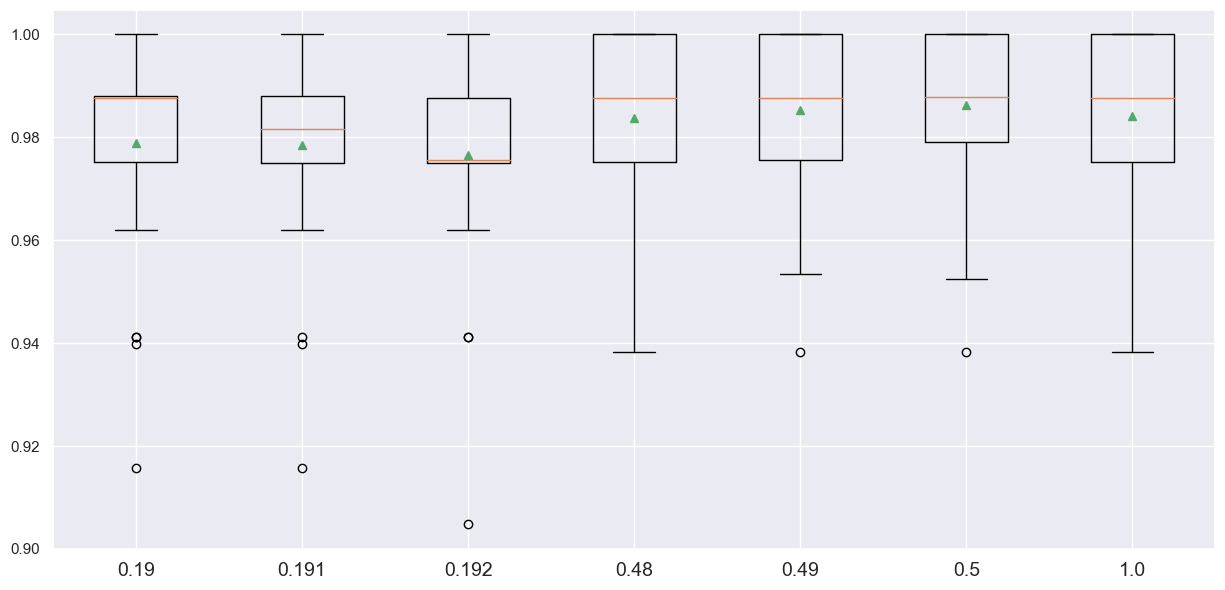

In [415]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 42, n_estimators = 100)      
    return models                         #now let´s see if we increase the nº of estimators.

models = get_models([0.19, 0.191, 0.192, 0.48, 0.49, 0.5, 1.0])
return_results(models)  

#best LR here is 0.5 with (avg=0.986)  para n_estimators as default (100)
#best LR here is 0.5 with (avg=0.986)  para n_estimators = 500
#best LR here is 1 with (avg=0.975)  para n_estimators = 20

In [416]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1,random_state = 42)
gradient_booster2 = GradientBoostingClassifier(learning_rate=0.5,random_state = 42)
gradient_booster3 = GradientBoostingClassifier(learning_rate=1,random_state = 42)

In [417]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['lr:0.1','lr:0.5','lr:1'])
show_results(df, gradient_booster,gradient_booster2,gradient_booster3)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
lr:0.1,0.098+/-0.0,0.985+/-0.0,0.986+/-0.0,0.942+/-0.03,0.944+/-0.03
lr:0.5,0.1+/-0.0,1.0+/-0.0,1.0+/-0.0,0.985+/-0.02,0.985+/-0.02
lr:1,0.097+/-0.0,1.0+/-0.0,1.0+/-0.0,0.976+/-0.02,0.977+/-0.02


And I also added this next 4 cells to test the 4th parameters (LR, nº_estimators, subsample, max_features)

>0.2 0.937 (0.027)
>0.5 0.954 (0.023)
>0.6 0.956 (0.024)
>0.7 0.956 (0.024)
>1.0 0.949 (0.025)


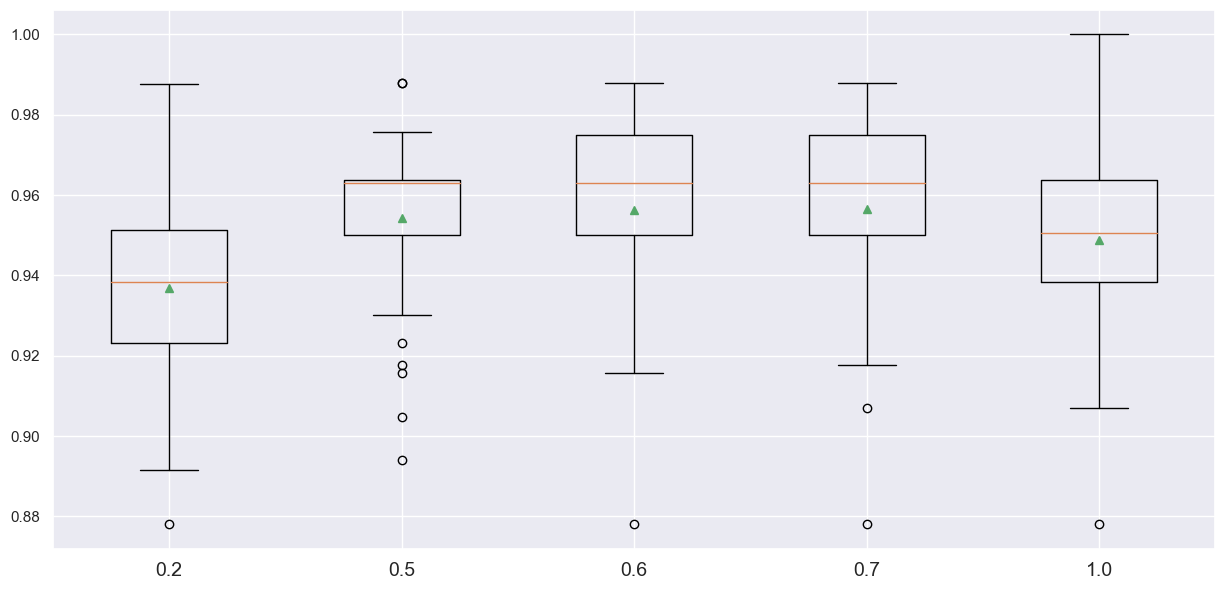

In [418]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 15, learning_rate=0.1)      
    return models

models = get_models([0.2,0.5,0.6,0.7,1.0])
return_results(models)

#para LR = 0.1 (default) best is 0.6   (0.957 -0.023)
#para LR = 0.48    best is 0.6    (0.986 -0.016)
#para LR = 0.5    best is 1.0    (0.987 -0.016)
#para LR = 0.19    best is 0.6  (0.987 -0.015)

>2 0.987 (0.014)
>0.5 0.986 (0.015)
>sqrt 0.988 (0.015)
>log2 0.988 (0.015)
>None 0.988 (0.016)


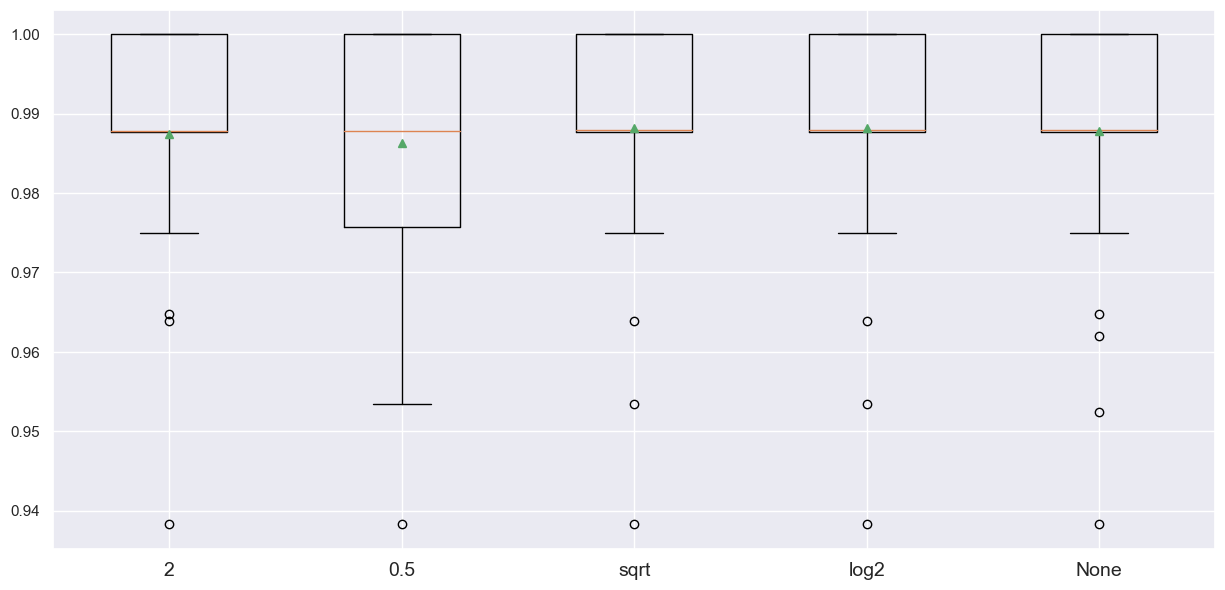

In [419]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 15, learning_rate=0.48, subsample=0.6)      
    return models

models = get_models([2,0.5,'sqrt','log2',None]) #sqrt of 10, logarithm of 10
return_results(models)

#to all default, best is None(all features) 0.949 and after 0.5 (half of features) 0.941
#subsample=0.6, best is None(all features) 0.957 and after 0.5 (half of features) 0.946
#LR=0.5, best is None(all features) 0.987 and after 0.5 (half of features) and 2features with 0.985
#LR=0.19, subsample=0.6, best is None(all features) 0.987 and after 0.5 (half of features) 0.982
#LR=0.48, subsample=0.6, best is sqrt and log2 with 0.988 and after 0.5 and None(half and all of features) 0.986

In [420]:
gradient_booster4 = GradientBoostingClassifier(learning_rate=0.19,random_state=42)
gradient_booster5 = GradientBoostingClassifier(learning_rate=0.19,random_state=42, subsample=0.6, max_features=None)
gradient_booster6 = GradientBoostingClassifier(learning_rate=0.48,random_state=42)
gradient_booster7 = GradientBoostingClassifier(learning_rate=0.48,random_state=42, subsample=0.6, max_features='sqrt')
gradient_booster8 = GradientBoostingClassifier(learning_rate=0.5,random_state=42, subsample=1, max_features=None)

In [421]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['lr:0.19','lr:0.19','lr:0.48','lr:0.48','lr:0.5'])
show_results(df, gradient_booster4,gradient_booster5,gradient_booster6,gradient_booster7,gradient_booster8)

#best LR here, for n_estimators as default(100) is 0.48 (0.988) and then 0.19 (0.987) and then 0.5 (0.985).
#best LR here, for n_estimators = 500 is 0.479 and 0.481 with (0.979) and then 1 and 0.19 with (0.978).
# we tried for n_estimators = 20 but it gave us a bad result.

,Time,Score Train,F1 Train,Score Validation,F1 Validation
lr:0.19,0.101+/-0.0,1.0+/-0.0,1.0+/-0.0,0.986+/-0.02,0.987+/-0.02
lr:0.19,0.096+/-0.0,1.0+/-0.0,1.0+/-0.0,0.978+/-0.02,0.978+/-0.02
lr:0.48,0.101+/-0.0,1.0+/-0.0,1.0+/-0.0,0.988+/-0.02,0.988+/-0.02
lr:0.48,0.071+/-0.0,1.0+/-0.0,1.0+/-0.0,0.989+/-0.02,0.989+/-0.01
lr:0.5,0.102+/-0.01,1.0+/-0.0,1.0+/-0.0,0.985+/-0.02,0.985+/-0.02


So the final gradient (the best) is:

In [422]:
final_gradient_boost = GradientBoostingClassifier(learning_rate=0.48,random_state=42, subsample=0.6, max_features='sqrt').fit(final_train_data,target)

In [424]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['final'])
show_results(df, final_gradient_boost)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
final,0.073+/-0.01,1.0+/-0.0,1.0+/-0.0,0.989+/-0.02,0.989+/-0.01


<a class="anchor" id="8.8">

## 8.8. AdaBoost Model
    
</a>

In [425]:
ab_model = AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state = 42)
ab_model2 = AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state = 42)
ab_model3 = AdaBoostClassifier(n_estimators=150,learning_rate=1,random_state = 42)
ab_model4 = AdaBoostClassifier(n_estimators=200,learning_rate=1,random_state = 42)

In [426]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['E:50','E:100','E:150','E:200'])
show_results(df, ab_model,ab_model2,ab_model3,ab_model4)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
E:50,0.085+/-0.0,0.91+/-0.01,0.913+/-0.01,0.871+/-0.04,0.878+/-0.04
E:100,0.168+/-0.01,0.939+/-0.01,0.94+/-0.01,0.906+/-0.03,0.908+/-0.03
E:150,0.257+/-0.03,0.948+/-0.01,0.95+/-0.01,0.91+/-0.04,0.912+/-0.04
E:200,0.338+/-0.02,0.955+/-0.0,0.957+/-0.0,0.92+/-0.03,0.921+/-0.03


In [427]:
ab_model5 = AdaBoostClassifier(n_estimators=200,learning_rate=0.01,random_state = 42)
ab_model6 = AdaBoostClassifier(n_estimators=200,learning_rate=0.1,random_state = 42)
ab_model7 = AdaBoostClassifier(n_estimators=200,learning_rate=0.5,random_state = 42)
ab_model8 = AdaBoostClassifier(n_estimators=200,learning_rate=1, random_state = 42)

In [428]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['E:0.01','E:0.1','E:0.5','E:1'])
show_results(df, ab_model5,ab_model6,ab_model7,ab_model8)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
E:0.01,0.338+/-0.04,0.847+/-0.01,0.853+/-0.01,0.844+/-0.05,0.849+/-0.05
E:0.1,0.329+/-0.02,0.886+/-0.0,0.89+/-0.0,0.864+/-0.03,0.869+/-0.03
E:0.5,0.33+/-0.02,0.934+/-0.01,0.936+/-0.01,0.896+/-0.04,0.9+/-0.04
E:1,0.314+/-0.01,0.955+/-0.0,0.957+/-0.0,0.92+/-0.03,0.921+/-0.03


In [429]:
final_adaboost = AdaBoostClassifier(n_estimators = 200,learning_rate = 1,random_state = 42).fit(final_train_data,target)

<a class="anchor" id="8.9">

## 8.9. Support Vector Machine
    
</a>

In [430]:
modelSVM = SVC(kernel='linear')
modelSVM_poly = SVC(kernel='poly')
modelSVM_sigmoid = SVC(kernel ='sigmoid')
modelSVM_rbf = SVC(kernel = 'rbf')

In [431]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['linear','poly','sigmoid','rbf'])
show_results(df, modelSVM,modelSVM_poly,modelSVM_sigmoid,modelSVM_rbf)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
linear,0.014+/-0.0,0.864+/-0.01,0.872+/-0.01,0.86+/-0.03,0.868+/-0.03
poly,0.014+/-0.0,0.922+/-0.0,0.926+/-0.0,0.894+/-0.03,0.899+/-0.03
sigmoid,0.019+/-0.0,0.736+/-0.01,0.741+/-0.01,0.747+/-0.05,0.748+/-0.05
rbf,0.029+/-0.0,0.901+/-0.01,0.906+/-0.01,0.861+/-0.03,0.868+/-0.02


In [432]:
model_C1 = SVC(C=1)
model_C10 = SVC(C=10)
model_C50 = SVC(C=50)
model_C100 = SVC(C=100)
model_C150 = SVC(C=150)
model_C200 = SVC(C=200)

In [433]:
df = pd.DataFrame(columns = ['Time','Score Train','F1 Train','Score Validation','F1 Validation'], index = ['C=1','C=10','C=50','C=100','C=150','C=200'])
show_results(df, model_C1,model_C10,model_C50,model_C100,model_C150,model_C200)

,Time,Score Train,F1 Train,Score Validation,F1 Validation
C=1,0.029+/-0.0,0.901+/-0.01,0.906+/-0.01,0.861+/-0.03,0.868+/-0.02
C=10,0.026+/-0.0,0.957+/-0.01,0.958+/-0.01,0.921+/-0.03,0.924+/-0.02
C=50,0.026+/-0.0,0.983+/-0.0,0.983+/-0.0,0.951+/-0.03,0.953+/-0.03
C=100,0.022+/-0.0,0.99+/-0.0,0.99+/-0.0,0.962+/-0.03,0.964+/-0.03
C=150,0.023+/-0.0,0.993+/-0.0,0.993+/-0.0,0.971+/-0.02,0.972+/-0.02
C=200,0.024+/-0.0,0.995+/-0.0,0.995+/-0.0,0.975+/-0.02,0.975+/-0.02


In [434]:
svm_model = SVC(kernel = 'poly',random_state=42).fit(final_train_data,target)

<a class="anchor" id="9">

# 9. Model Assessment
    
</a>

### Compare Results

| Model | Score Train | F1-Score Train | Score Validation | F1-Score Validation |
| --- | --- | --- | --- | --- |
| KNN | 1.0+/-0.0 | 1.0+/-0.0 | 0.988+/-0.02 | 0.988+/-0.02 |
| Neural Network | 1.0+/-0.0 | 1.0+/-0.0 | 0.98+/-0.02 | 0.98+/-0.02 |
| Gradient Boost | 1.0+/-0.0 | 1.0+/-0.0 | 0.989+/-0.02 | 0.989+/-0.01 |
| XGBoost | 1.0+/-0.0 | 1.0+/-0.0 | 0.985+/-0.02 | 0.985+/-0.02 |

### ROC Curve to compare models

In [435]:
#Adapted from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
def createROCCurve(classifier,classifier_name):   
    cv = StratifiedKFold(n_splits=10)
    #classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(6, 6))
    for fold, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X.iloc[train], y.iloc[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X.iloc[test],
            y.iloc[test],
            name=f"ROC fold {fold}",
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = round(auc(mean_fpr, mean_tpr),3)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"Mean ROC curve for '{classifier_name}'",
    )
    ax.axis("square")
    ax.legend(loc="lower right")
    plt.show()


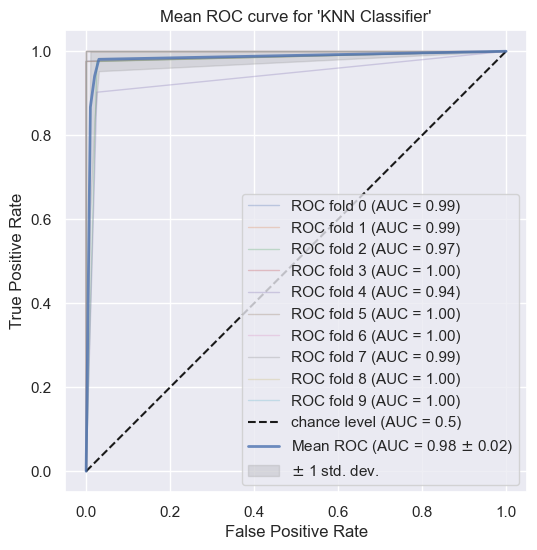

In [436]:
createROCCurve(final_knn_model,'KNN Classifier')

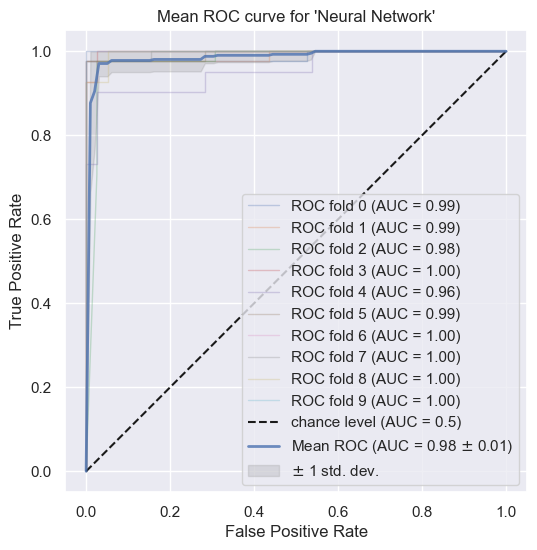

In [437]:
createROCCurve(final_mlp_model,'Neural Network')

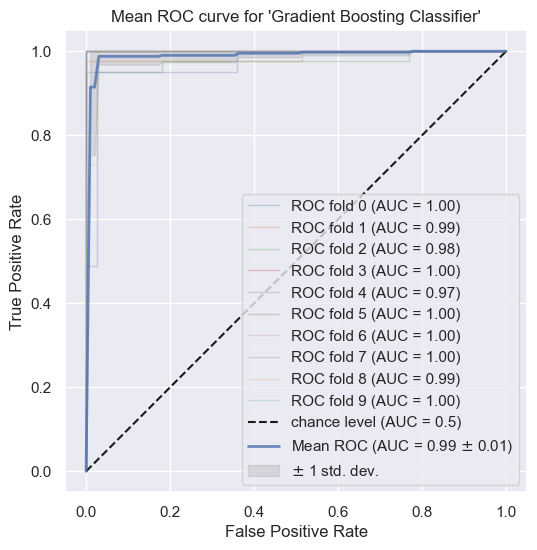

In [438]:
createROCCurve(final_gradient_boost,'Gradient Boosting Classifier')

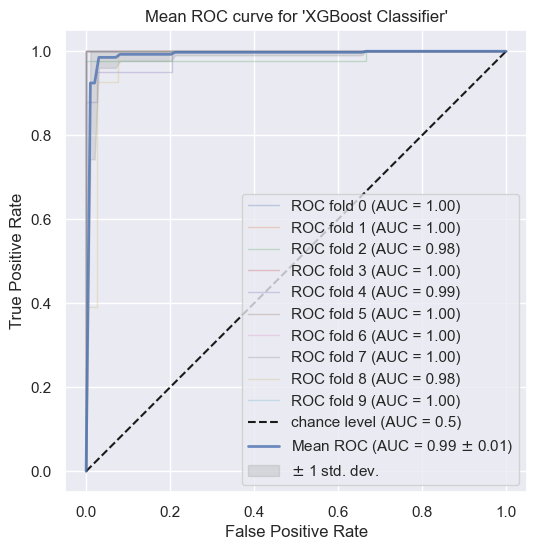

In [439]:
createROCCurve(final_xgboost,'XGBoost Classifier')

<a class="anchor" id="10">

# 10. Final Model
    
</a>

In [440]:
y_pred_test = final_gradient_boost.predict(final_test_data)
tuplos = list(zip(final_test_data.index,y_pred_test))


pred_df = pd.DataFrame(tuplos,columns = ['PatientID','Disease'])
pred_df.set_index('PatientID',inplace = True)
pred_df.to_csv("predictions_submission_gradient_boosting.csv")